<h1><center>Cardiovascular Disease, Exploration and Visualization</center></h1>

Heart attack is the second cause of disability in the world. CVD is rapidly increasing day by day, as stated by WHO. Cardiovascular-related problems cause 31% of worldwide deaths. Thus, it's increasingly necessary to be able to identify health habits and symptoms that contribute to heart attacks.

The objective of preparing this notebook is to better understand the relationship of various factors in the dataset that can be related to heart disease.  The results of this notebook will be the basis of the development of both the web platform and the machine learning prediction model.

We're going to utlize the following workflow:

1. Problem definition
2. Data
3. Importing Dataset & Libraries
4. Data Preprocessing & Cleaning
5. Data Visualizations & Insights

<center><img src='https://i.pinimg.com/originals/87/45/76/874576ebe081d0b3cc15c1a519dcb6c1.gif'></center>

## 1. Problme Statement

In a statement,

> Given clinical parameters about a patient, can we understand the most correlated attributes and reasons for heart disease?

## 2. Data

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features by IEEE scholars which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

The Dataset Can be accessed directly from IEEE Datasets. <br>
https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive#files

## 3. Importing Dataset & Libraries 

### 3.1. Importing Libraries and Configurations

In [2]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import proplot as pplt
import missingno as msno
import pandas_profiling as pp
import matplotlib.font_manager
import plotly.express as px

In [4]:
import plotly.graph_objs as go

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
# we want our visualization to appear inside the notebook
%matplotlib inline

In [244]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### 3.1. Importing The Dataset

In [8]:
#Dataset 
heartDf = pd.read_csv("cardiovascular disease.csv")

In [4]:
#Testing
heartDf.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [5]:
heartDf.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

| Feature | Description |
| :- | :- |
| Age | age of the patient [years]
| Sex | sex of the patient [M: Male, F: Female]
| ChestPainType | chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
| RestingBP | resting blood pressure [mm Hg]
| Cholesterol | serum cholesterol [mm/dl]
| FastingBS | fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
| RestingECG | resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
| MaxHR | maximum heart rate achieved [Numeric value between 60 and 202]
| ExerciseAngina | exercise-induced angina [Y: Yes, N: No]
| Oldpeak | oldpeak = ST [Numeric value measured in depression]
| ST_Slope | the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
| HeartDisease | output class [1: heart disease, 0: Normal]

## 4.  Data Preprocessing & Cleaning

### 4.1. Basic Info

In [7]:
#Number of Observations and Features
print(f"Number of Observations:--> {heartDf.shape[0]}\nNumber of Features:--> {heartDf.shape[1]}")

Number of Observations:--> 918
Number of Features:--> 12


In [8]:
#Basic meta information about the Data 
heartDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
# Checking the number of a particular data type
print('Count of Features per Data Type:')
heartDf.dtypes.value_counts()

Count of Features per Data Type:


int64      6
object     5
float64    1
dtype: int64

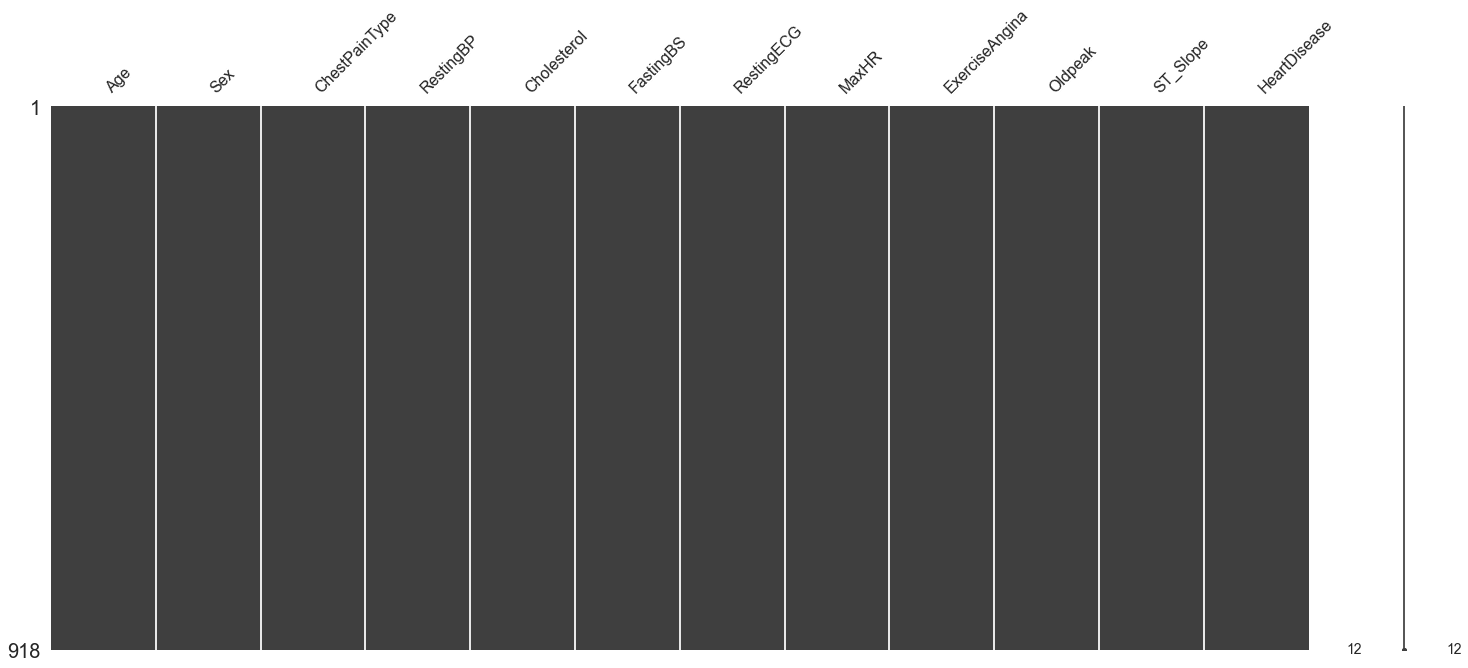

In [10]:
msno.matrix(heartDf);

- Data is clean

In [11]:
#Checking for duplications in rows
print('Number of Duplicates:', len(heartDf[heartDf.duplicated()]))

# Checking for any missing values 
print('Number of Missing Values:', heartDf.isnull().sum().sum())

Number of Duplicates: 0
Number of Missing Values: 0


### 4.2. Data Processing for EDA

In [9]:
# Renamming some categories and columns to make the EDA visualization neater
heartDf.loc[heartDf['HeartDisease'] == 1, 'HeartDisease'] = 'ill' 
heartDf.loc[heartDf['HeartDisease'] == 0, 'HeartDisease'] = 'healthy' 

In [10]:
heartDf.loc[heartDf['Sex'] == 'M', 'Sex'] = 'male'
heartDf.loc[heartDf['Sex'] == 'F', 'Sex'] = 'female'

In [11]:
heartDf.loc[heartDf['ExerciseAngina'] == 'Y', 'ExerciseAngina'] = 'yes'
heartDf.loc[heartDf['ExerciseAngina'] == 'N', 'ExerciseAngina'] = 'no' 

In [12]:
#Changing Fasting from binary to str to ease the EDA
heartDf['FastingBS'] = heartDf['FastingBS'].astype(str)

In [13]:
heartDf = heartDf.rename(columns = {'ChestPainType':'Chest Pain Type', 
                          'RestingBP':'Resting BP', 
                          'FastingBS':'Fasting BS',
                          'RestingECG':'Resting ECG',
                          'MaxHR':'Max HR',
                          'ExerciseAngina':'Exercise Angina',
                          'ST_Slope':'ST Slope',
                          'HeartDisease':'Heart Disease'})

In [26]:
heartDf

Age     Sex Chest Pain Type  Resting BP  Cholesterol Fasting BS  \
0     40    male             ATA         140          289          0   
1     49  female             NAP         160          180          0   
2     37    male             ATA         130          283          0   
3     48  female             ASY         138          214          0   
4     54    male             NAP         150          195          0   
..   ...     ...             ...         ...          ...        ...   
913   45    male              TA         110          264          0   
914   68    male             ASY         144          193          1   
915   57    male             ASY         130          131          0   
916   57  female             ATA         130          236          0   
917   38    male             NAP         138          175          0   

    Resting ECG  Max HR Exercise Angina  Oldpeak ST Slope Heart Disease  
0        Normal     172              no      0.0       Up       healthy  
1        Normal     156              no      1.0     Flat           ill  
2            ST      98              no      0.0       Up       healthy  
3        Normal     108             yes      1.5     Flat           ill  
4        Normal     122              no      0.0       Up       healthy  
..          ...     ...             ...      ...      ...           ...  
913      Normal     132              no      1.2     Flat           ill  
914      Normal     141              no      3.4     Flat           ill  
915      Normal     115             yes      1.2     Flat           ill  
916         LVH     174              no      0.0     Flat           ill  
917      Normal     173              no      0.0       Up       healthy  

[918 rows x 12 columns]

## 5. Data Visualizations & Insights

### 5.1. Insights on the Dataset Features

In [28]:
heartDf.describe(include = [np.number])

Age  Resting BP  Cholesterol      Max HR     Oldpeak
count  918.000000  918.000000   918.000000  918.000000  918.000000
mean    53.510893  132.396514   198.799564  136.809368    0.887364
std      9.432617   18.514154   109.384145   25.460334    1.066570
min     28.000000    0.000000     0.000000   60.000000   -2.600000
25%     47.000000  120.000000   173.250000  120.000000    0.000000
50%     54.000000  130.000000   223.000000  138.000000    0.600000
75%     60.000000  140.000000   267.000000  156.000000    1.500000
max     77.000000  200.000000   603.000000  202.000000    6.200000

Insights of the Dataset: 
- The avarage age is 53.5. 
- The average Cholesterol level is 198.79 Mg. 
- Heart rate ranges from 60 to 202 beats per minute.
- Cholesterol feature is imbalanced and there seems to be outliers.

In [175]:
def plot_design():
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=15, color='black')
    plt.xticks(fontsize=15, color='black')
    plt.box(False)
    plt.title(i[1], fontsize=24, color='black')
    plt.tight_layout(pad=7.0)

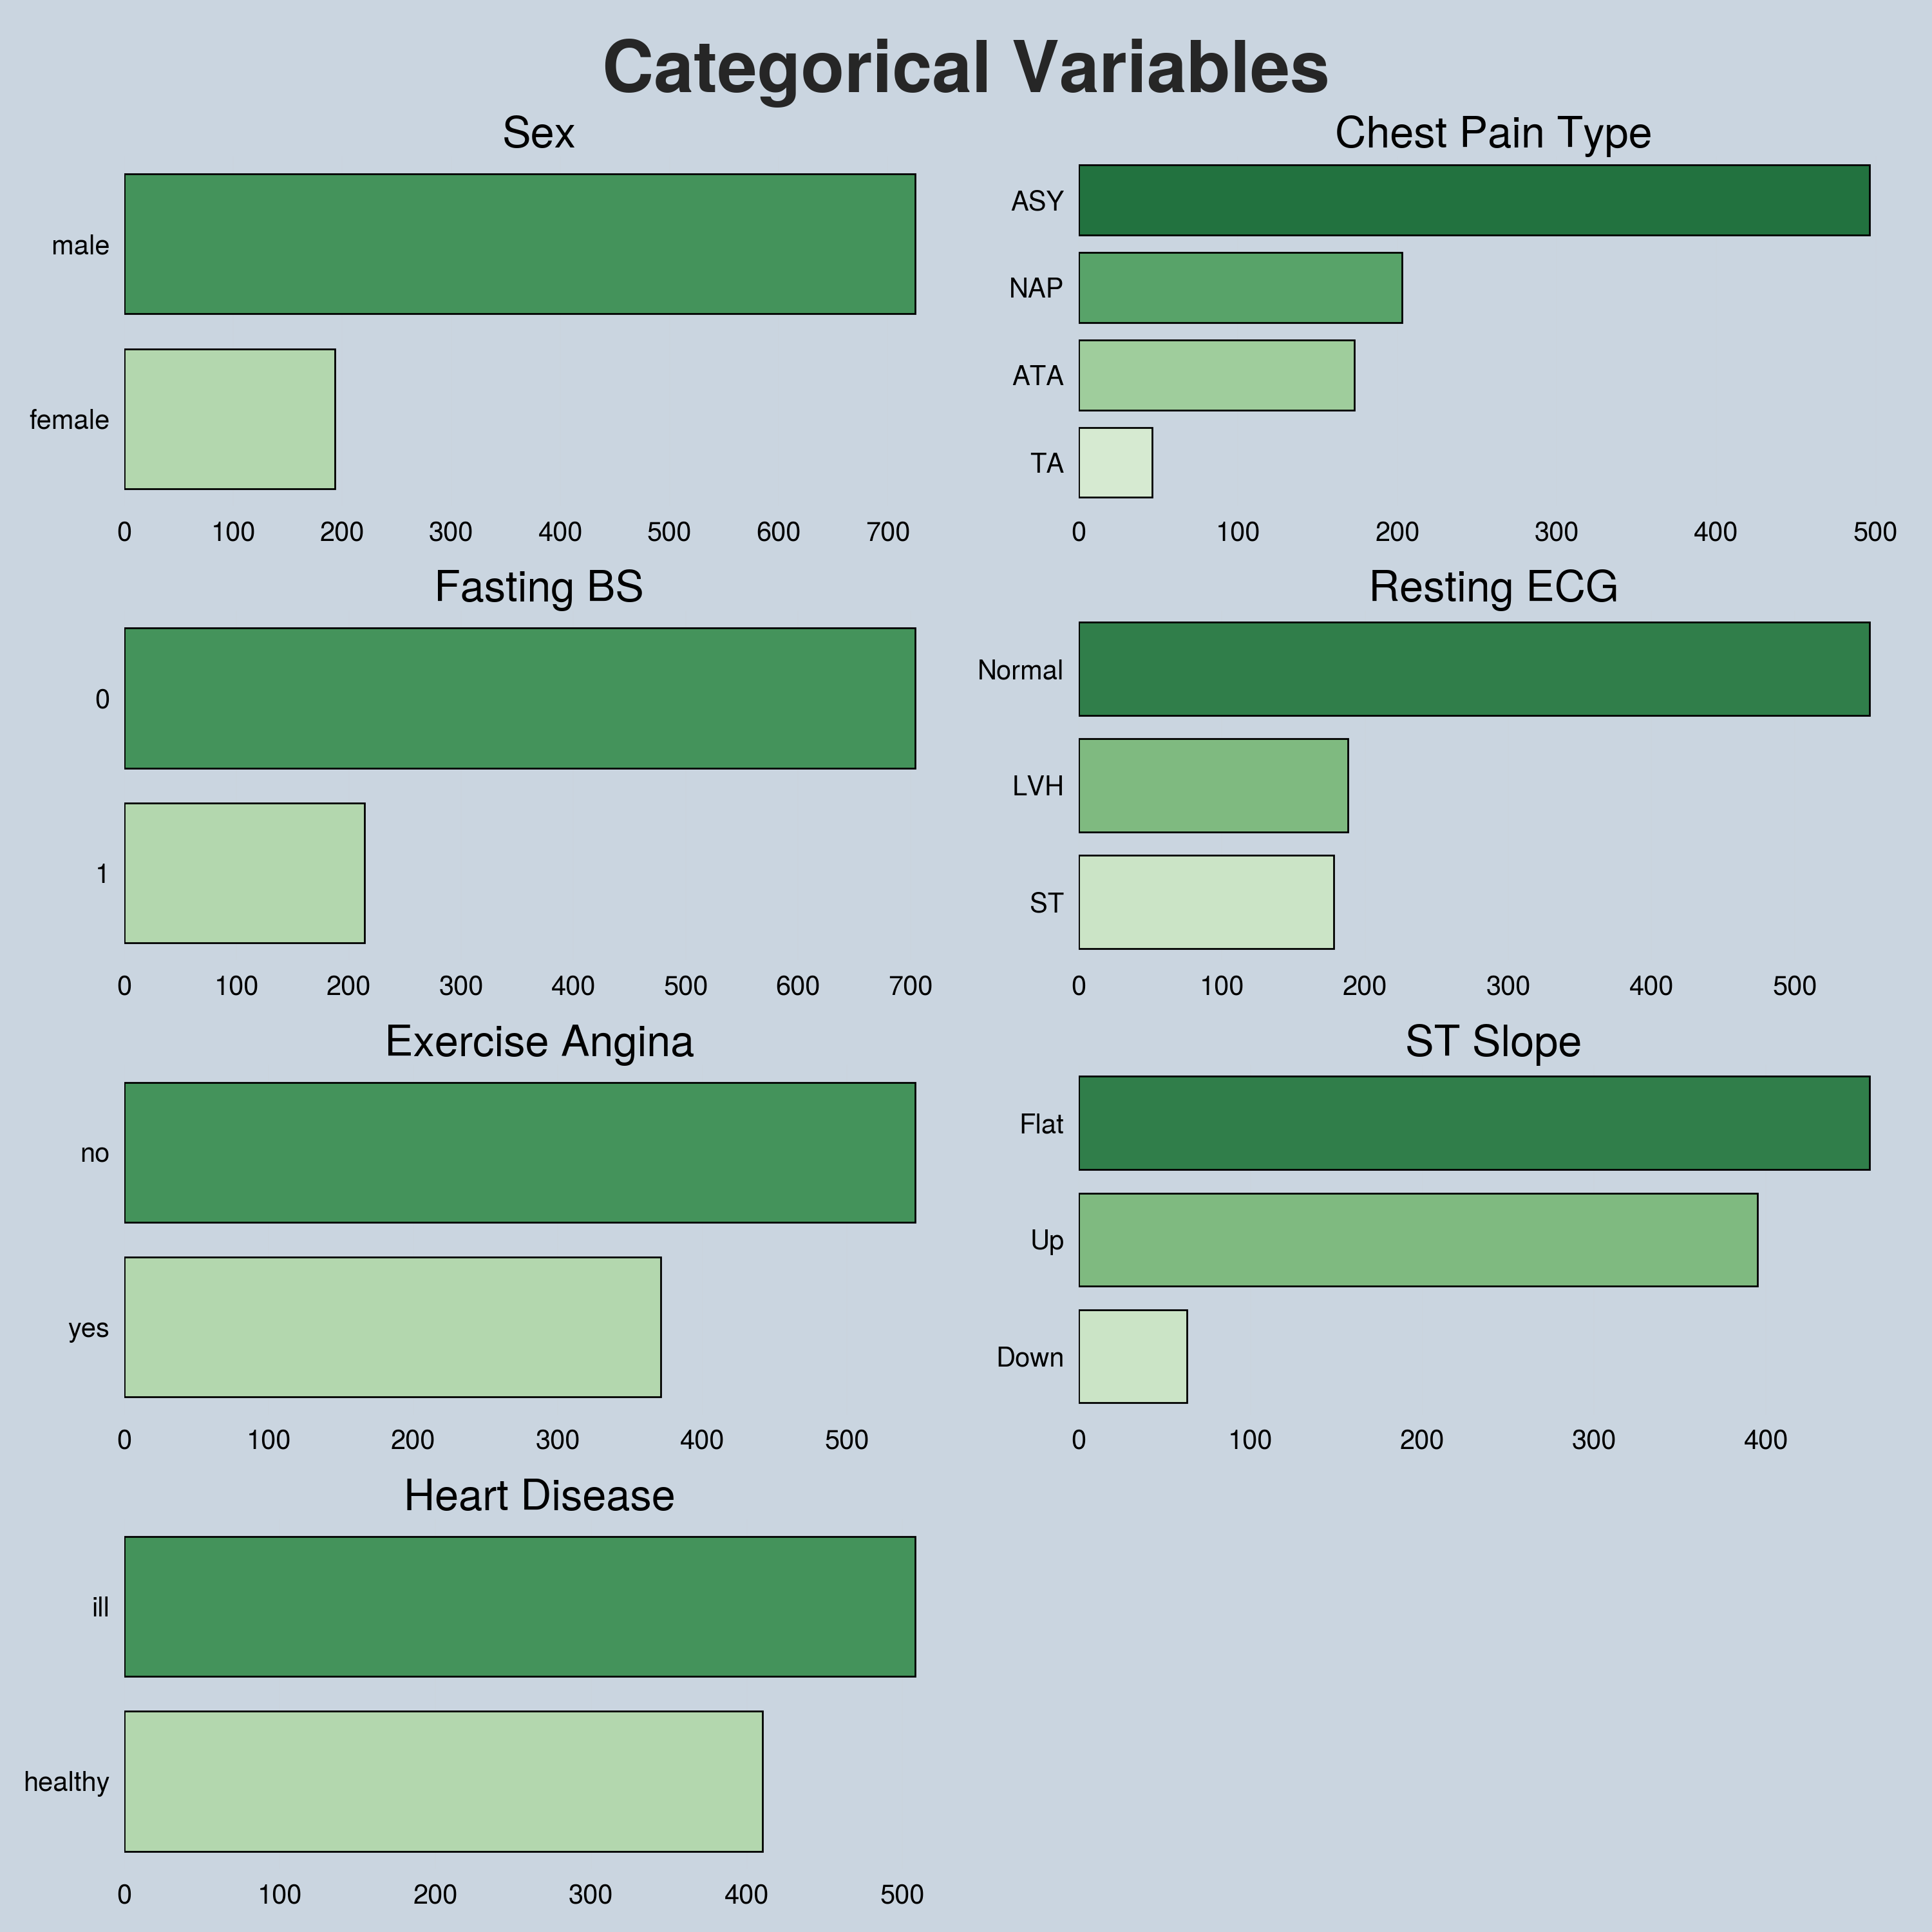

In [176]:
# Select categorical variables
categ = heartDf.select_dtypes(include=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('#CAD5E0')
mpl.rcParams['font.family'] = 'TeX Gyre Heros'

# Loop columns
for i in (enumerate(categ)):
    plt.subplot(4, 2, i[0]+1)
    sns.countplot(y = i[1], data = heartDf, order=heartDf[i[1]].value_counts().index, palette='Greens_r', edgecolor='black')
    plot_design()
    plt.suptitle('Categorical Variables', fontsize=40)

- Note that HeartDisease, the target variable of this dataset, is decently balanced. However, As for other features like Sex, Fasting BS and Chest Pain Type, the dataset looks imbalanced.

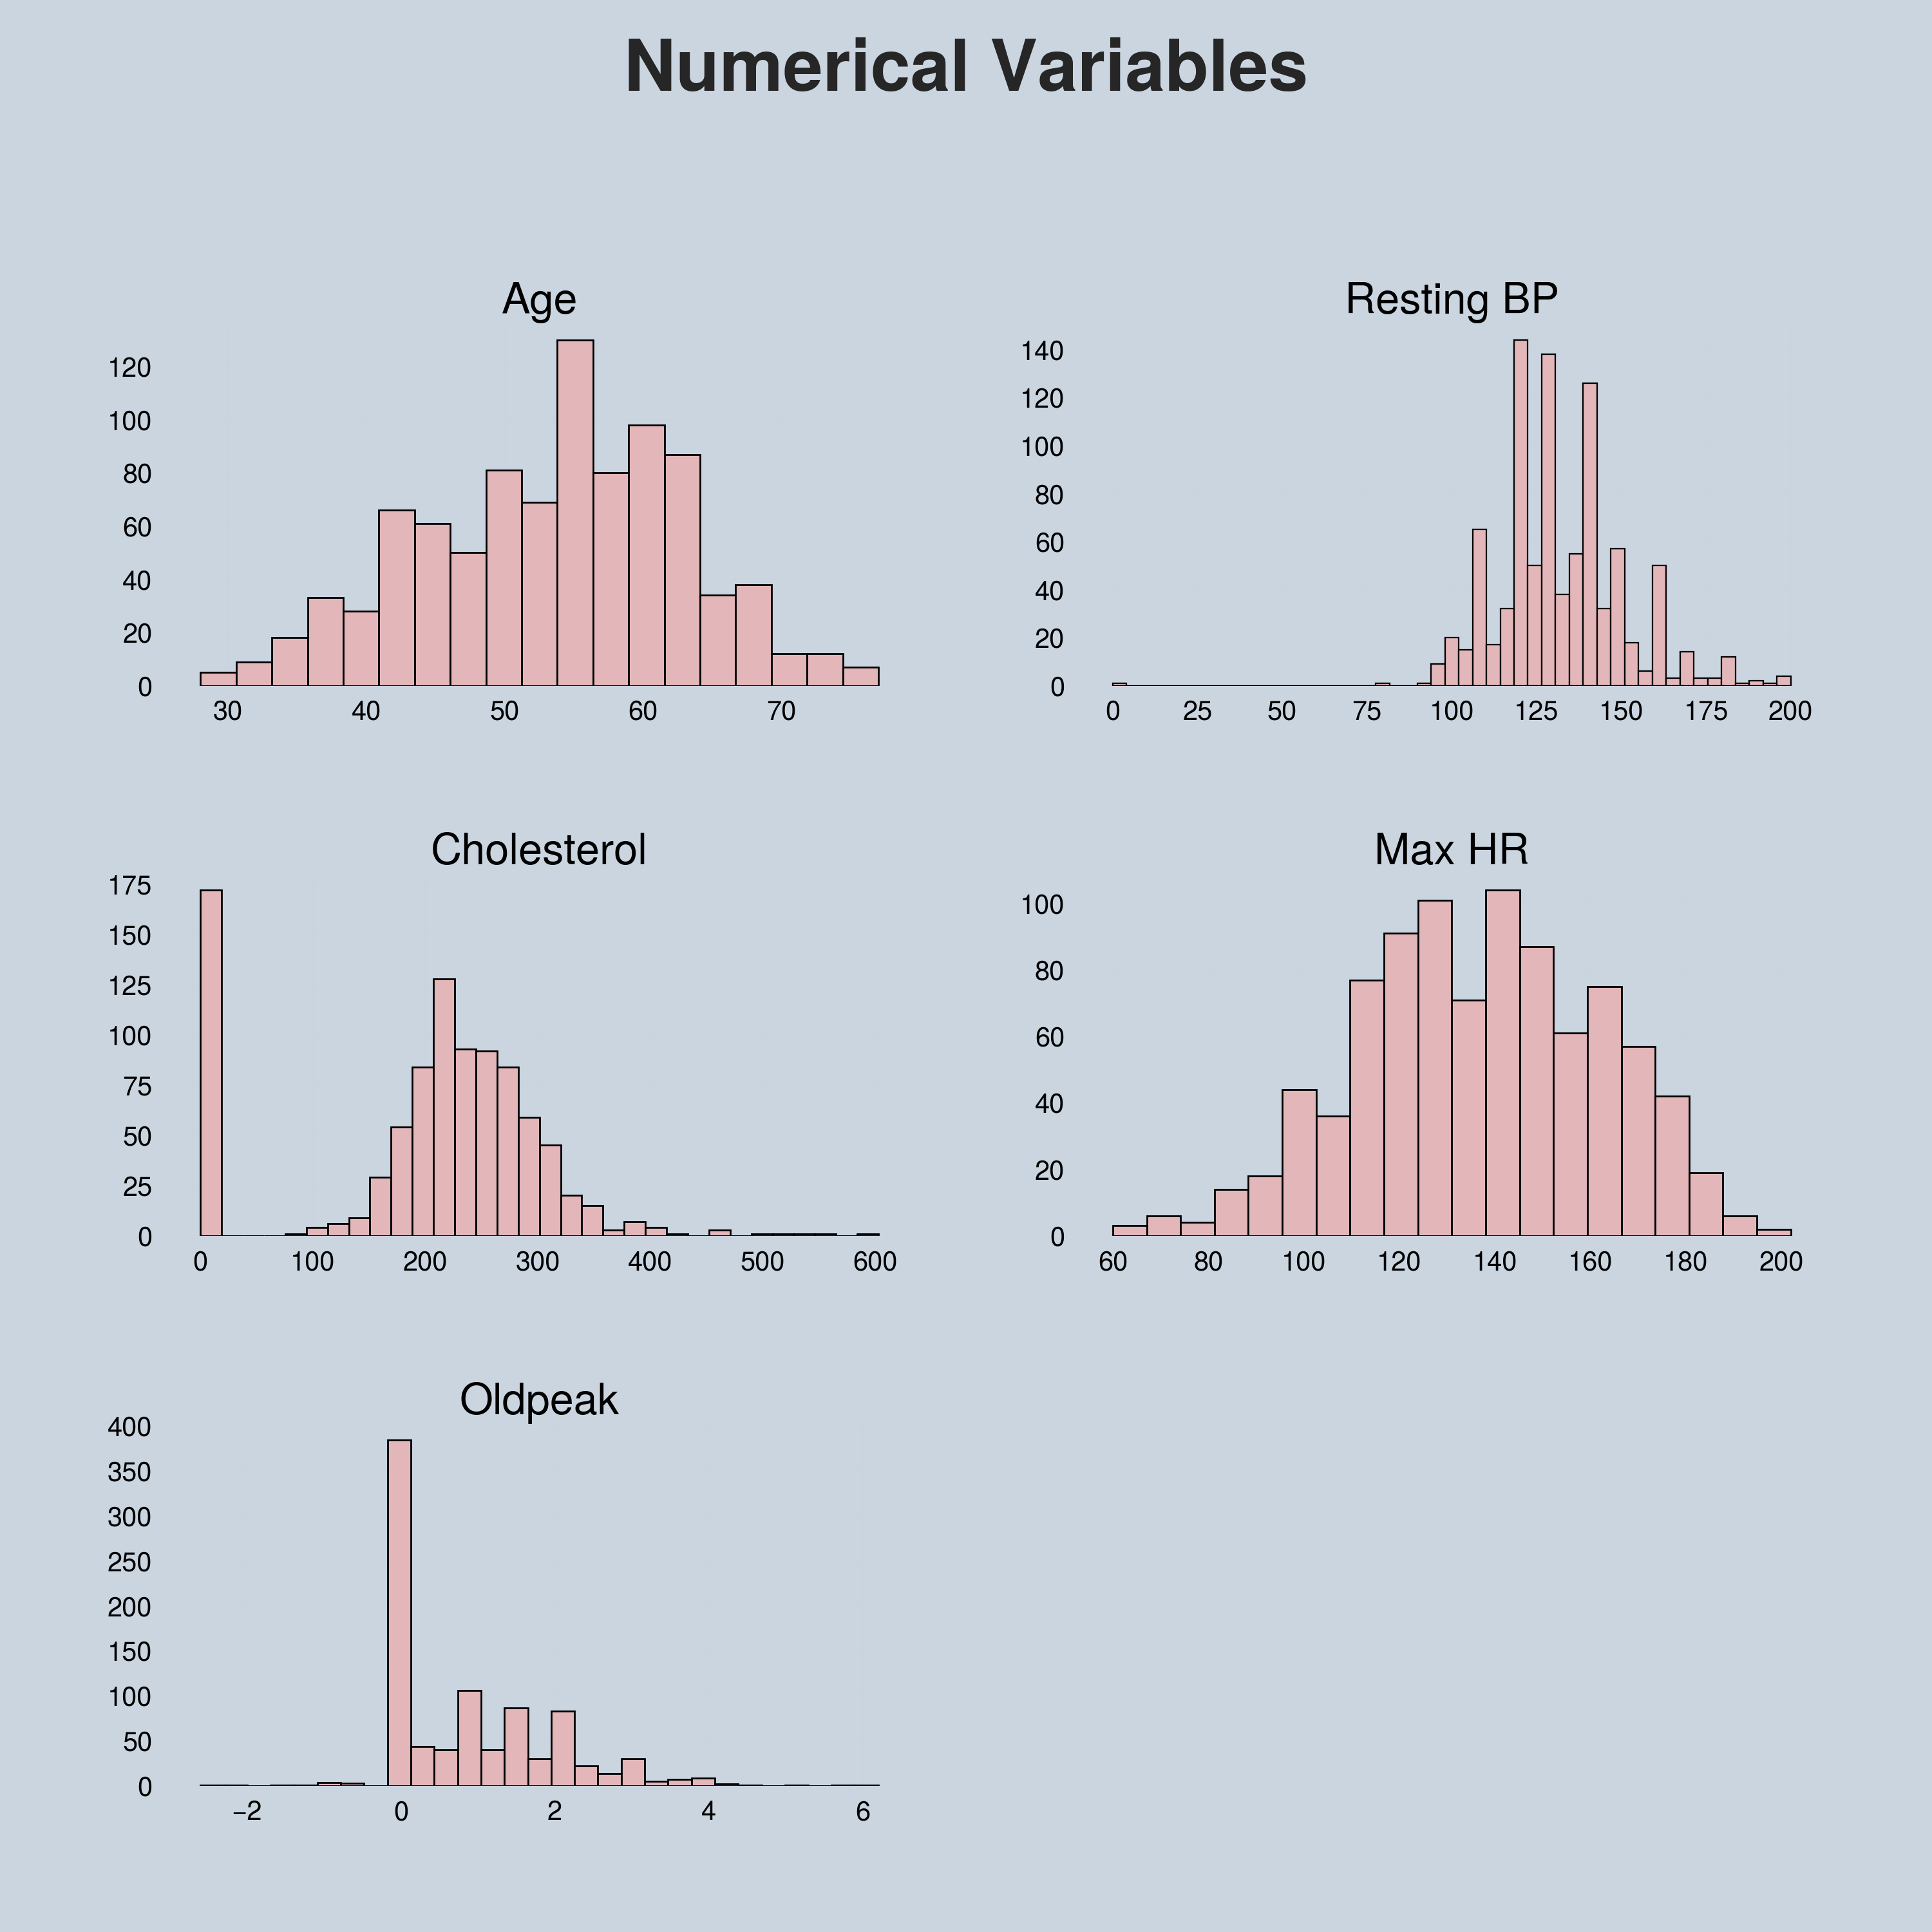

In [164]:
# Select numerical variables
numeric = heartDf.select_dtypes(exclude=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('#CAD5E0')
mpl.rcParams['font.family'] = 'TeX Gyre Heros'

# Loop columns
for i in (enumerate(numeric)):
    plt.subplot(3, 2, i[0]+1)
    sns.histplot(x = i[1], data = heartDf, color='#ECACAE', edgecolor='black')
    plot_design()
    plt.suptitle('Numerical Variables', fontsize=40)

- As for the Numerical features, the data sets look balanced in features like Max HR and Resting BP. 

In [ ]:
# Checking for any correlations between independent features 
# and between Features and the target variable 

#Creating a dataframe where we use int64 values for all features
heart = pd.read_csv("cardiovascular disease.csv")

#Sex
heart.loc[heart.Sex == 'M', "Sex"] = 1
heart.loc[heart.Sex == 'F', "Sex"] = 0
heart["Sex"] = heart["Sex"].astype('int64')

#ExerciseAngina
heart.loc[heart.ExerciseAngina == 'N', "ExerciseAngina"] = 0
heart.loc[heart.ExerciseAngina == 'Y', "ExerciseAngina"] = 1
heart["ExerciseAngina"] = heart["ExerciseAngina"].astype('int64')

#RestingECG
heart.loc[heart.RestingECG == 'Normal', "RestingECG"] = 0
heart.loc[heart.RestingECG == 'ST', "RestingECG"] = 1
heart.loc[heart.RestingECG == 'LVH', "RestingECG"] = 2
heart["RestingECG"] = heart["RestingECG"].astype('int64')

#ST_Slope
heart.loc[heart.ST_Slope == 'Up', "ST_Slope"] = 0
heart.loc[heart.ST_Slope == 'Flat', "ST_Slope"] = 1
heart.loc[heart.ST_Slope == 'Down', "ST_Slope"] = 2
heart["ST_Slope"] = heart["ST_Slope"].astype('int64')


In [350]:
heart.corr()

Age       Sex  RestingBP  Cholesterol  FastingBS  \
Age             1.000000  0.055750   0.254399    -0.095282   0.198039   
Sex             0.055750  1.000000   0.005133    -0.200092   0.120076   
RestingBP       0.254399  0.005133   1.000000     0.100893   0.070193   
Cholesterol    -0.095282 -0.200092   0.100893     1.000000  -0.260974   
FastingBS       0.198039  0.120076   0.070193    -0.260974   1.000000   
RestingECG      0.213152 -0.018343   0.097661     0.112095   0.050707   
MaxHR          -0.382045 -0.189186  -0.112135     0.235792  -0.131438   
ExerciseAngina  0.215793  0.190664   0.155101    -0.034166   0.060451   
Oldpeak         0.258612  0.105734   0.164803     0.050148   0.052698   
ST_Slope        0.268264  0.150693   0.075162    -0.111471   0.175774   
HeartDisease    0.282039  0.305445   0.107589    -0.232741   0.267291   
Heart Disease   0.282039  0.305445   0.107589    -0.232741   0.267291   

                RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  \
Age               0.213152 -0.382045        0.215793  0.258612  0.268264   
Sex              -0.018343 -0.189186        0.190664  0.105734  0.150693   
RestingBP         0.097661 -0.112135        0.155101  0.164803  0.075162   
Cholesterol       0.112095  0.235792       -0.034166  0.050148 -0.111471   
FastingBS         0.050707 -0.131438        0.060451  0.052698  0.175774   
RestingECG        1.000000  0.048552        0.036119  0.114428  0.078807   
MaxHR             0.048552  1.000000       -0.370425 -0.160691 -0.343419   
ExerciseAngina    0.036119 -0.370425        1.000000  0.408752  0.428706   
Oldpeak           0.114428 -0.160691        0.408752  1.000000  0.501921   
ST_Slope          0.078807 -0.343419        0.428706  0.501921  1.000000   
HeartDisease      0.061011 -0.400421        0.494282  0.403951  0.558771   
Heart Disease     0.061011 -0.400421        0.494282  0.403951  0.558771   

                HeartDisease  Heart Disease  
Age                 0.282039       0.282039  
Sex                 0.305445       0.305445  
RestingBP           0.107589       0.107589  
Cholesterol        -0.232741      -0.232741  
FastingBS           0.267291       0.267291  
RestingECG          0.061011       0.061011  
MaxHR              -0.400421      -0.400421  
ExerciseAngina      0.494282       0.494282  
Oldpeak             0.403951       0.403951  
ST_Slope            0.558771       0.558771  
HeartDisease        1.000000       1.000000  
Heart Disease       1.000000       1.000000

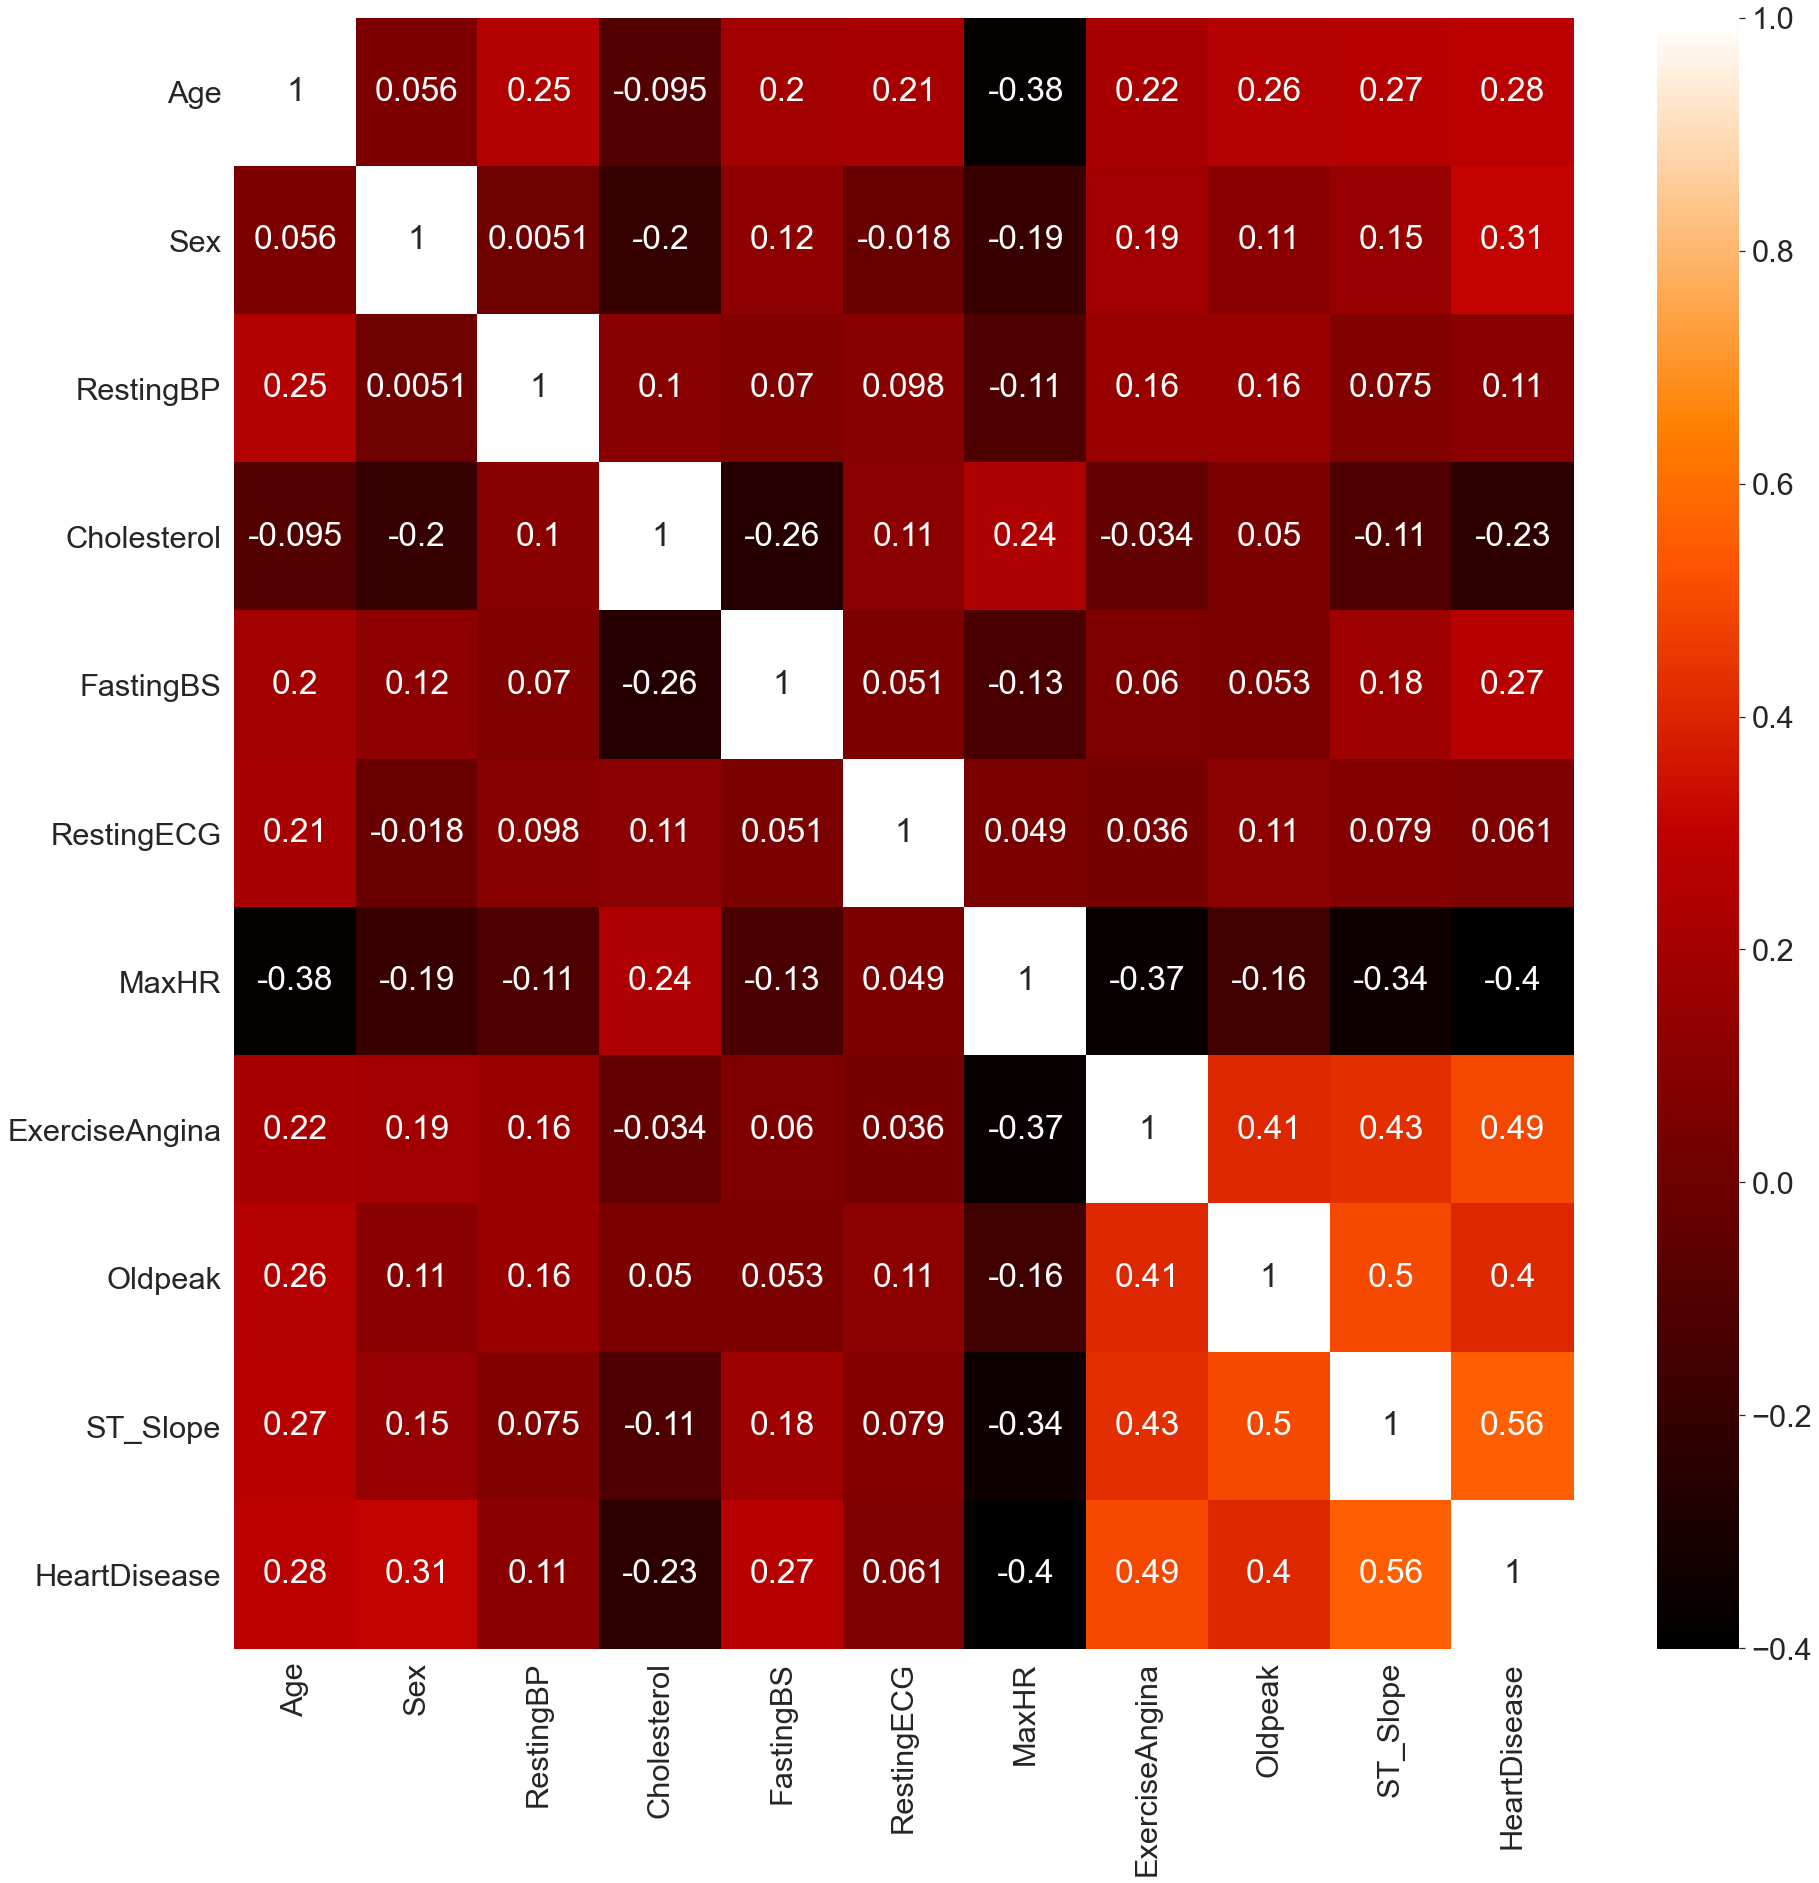

In [21]:
# Plot settings 
plt.figure(figsize=(30,30))
sns.set(font_scale=2.8);


#plot heat map
sns.heatmap(heart.corr(),annot=True,cmap="gist_heat");


- There are no highly correlated features or multicollinearity problems in the dataset. However, If we look closely, the slope of the peak exercise & Exercise Angine are the most correlated features to the target. Since there are no strongly correlated elements its better not using linear regression for ML.

### 5.2. Insights on the Data

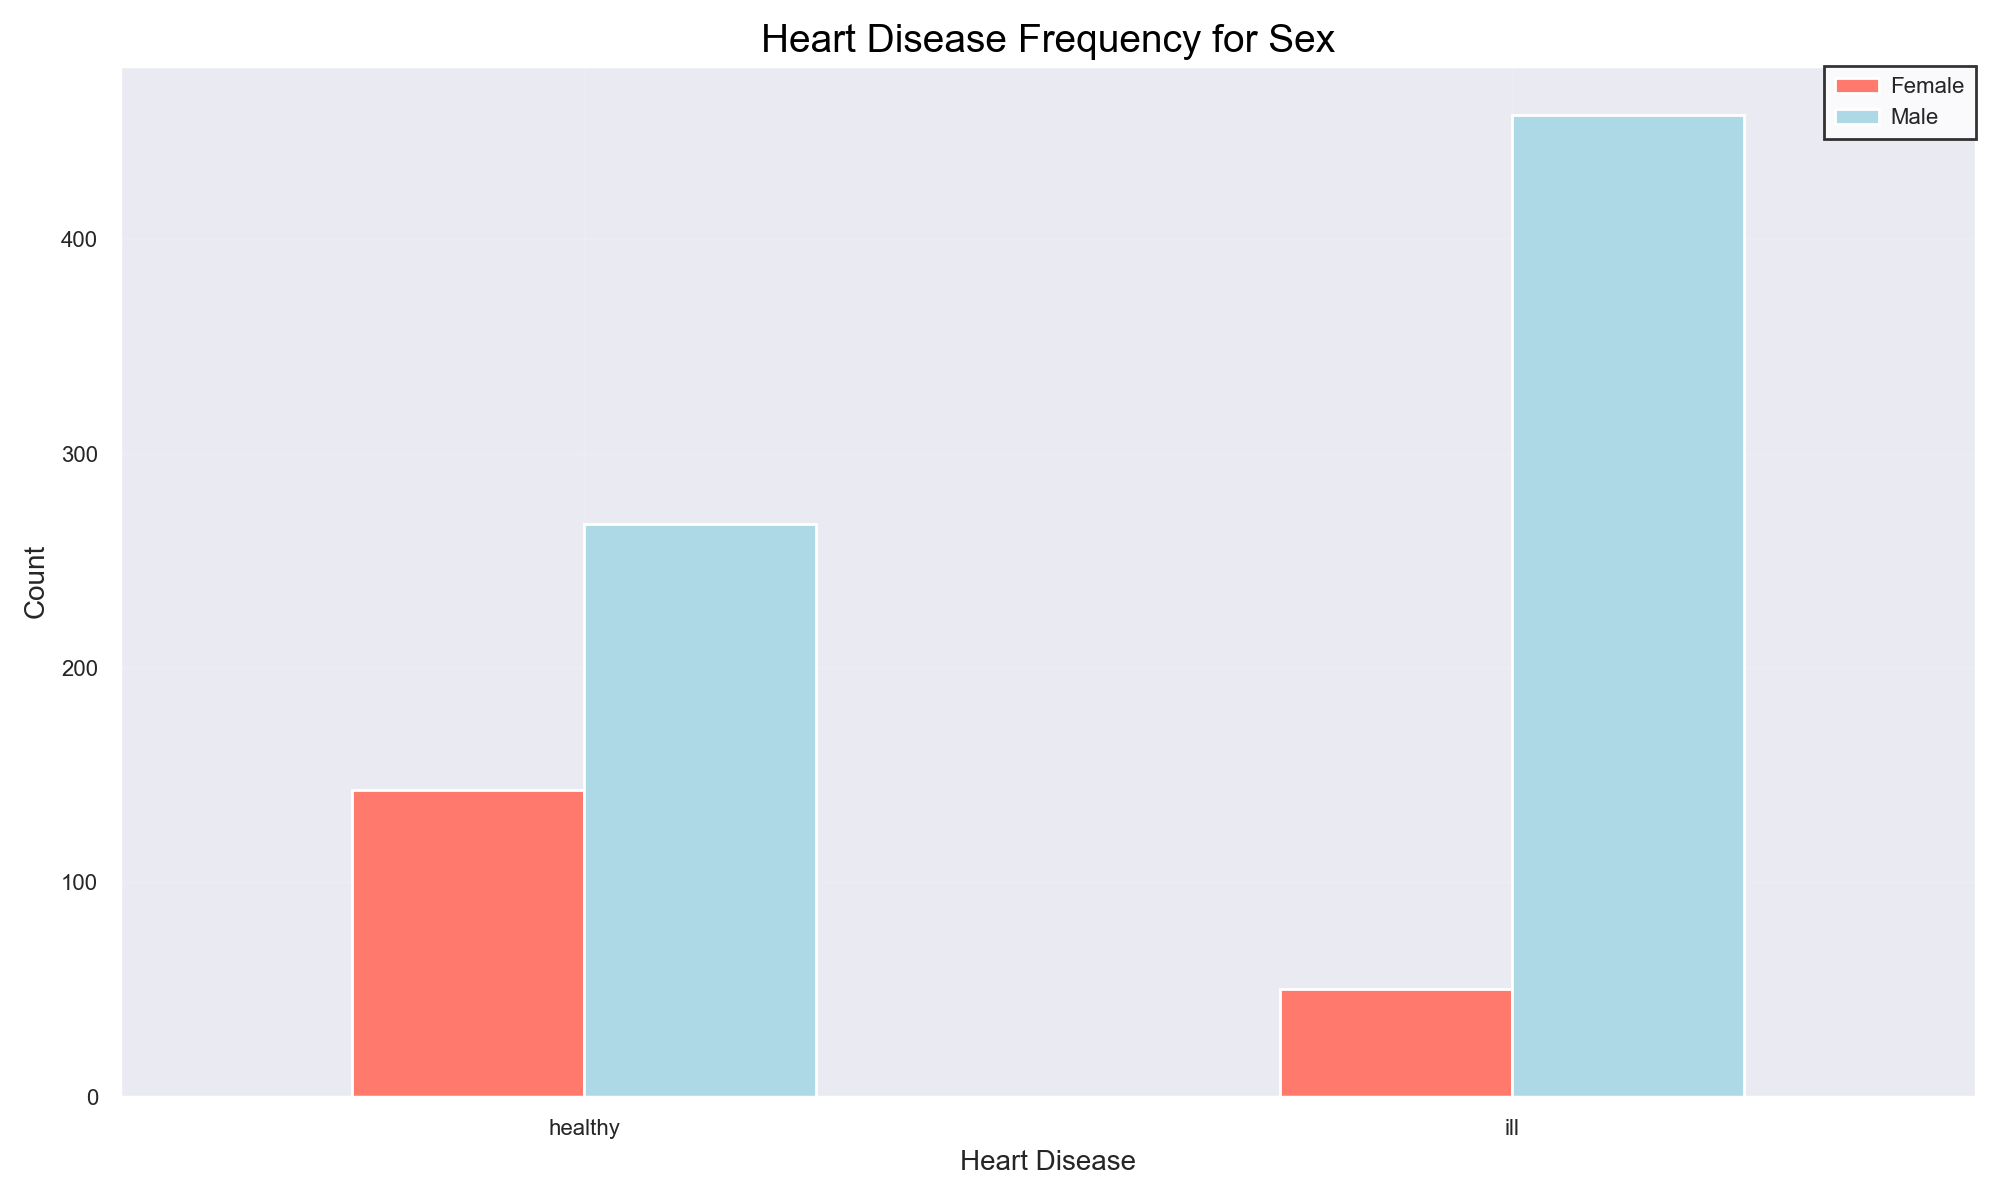

In [252]:
# Create a plot of crosstab
pd.crosstab(heartDf['Heart Disease'], heartDf.Sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex", fontsize=14)
plt.ylabel("Count")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

From the above graph the following was concluded:

- <span style="color:#003ba8"> "Sex" </span>: male patients had a significantly higher rate of illness than women had;

In [24]:
fig = px.scatter(heartDf, x="Sex", y="Age", title=' Age vs Sex', color = "Heart Disease") 
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='MediumPurple')),
                  selector=dict(mode='markers'))
fig.show()

In [18]:
fig = px.scatter(heartDf, x="Age", y="Max HR", title='Cholestrol vs Age', color = "Heart Disease") 
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='MediumPurple')),
                  selector=dict(mode='markers'))
fig.show()

- <span style="color:#003ba8"> "Max Heart Rate" </span>: No correlations or special patterns between max heart rate and age with heart attack problems.

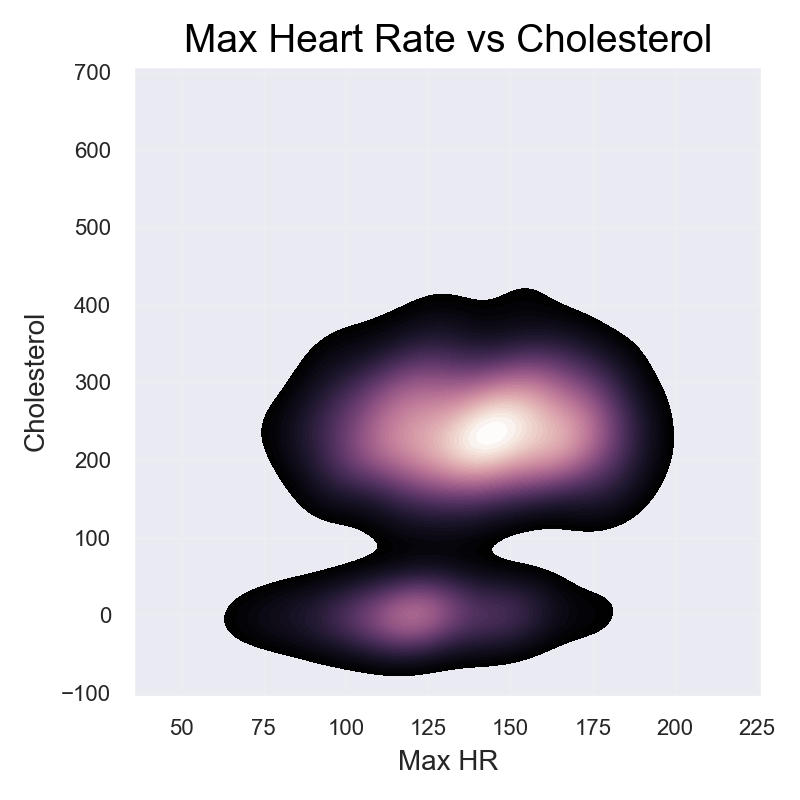

In [254]:
f, ax = plt.subplots(figsize=(4, 4))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(heartDf['Max HR'], heartDf.Cholesterol, cmap=cmap, n_levels=60, shade=True);
plt.title('Max Heart Rate vs Cholesterol', fontsize=14);

- <span style="color:#003ba8"> "Cholesterol" </span>: Patients with high levels of Cholesterol tend to have higher heart rate. However, there's no correlation between higher heart rate and heart attack.



In [16]:
fig = px.scatter(heartDf, x="Age", y="Cholesterol", title='Cholestrol vs Age', color = "Heart Disease") 
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color= 'DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

- <span style="color:#003ba8"> "Cholesterol" </span>: As we can see the cholestrol value is mostly confined between 190-320 with maximum heart rate value is 200. And maximum patients with heart disease have heart rate between 190-202.

In [17]:
fig = px.scatter(heartDf, x = 'Resting BP', y = 'Cholesterol', title='Cholestrol vs Blood Pressure', 
                 facet_col = 'Sex', # the name of the column in the dataframe whose values are used for creating subplots
                 color = 'Heart Disease')
fig.show()

- <span style="color:#003ba8"> ""Cholesterol"" </span>: Men are more likely to have a heart desease when thier choloestorl level exceeds 250 milligrams per deciliter.

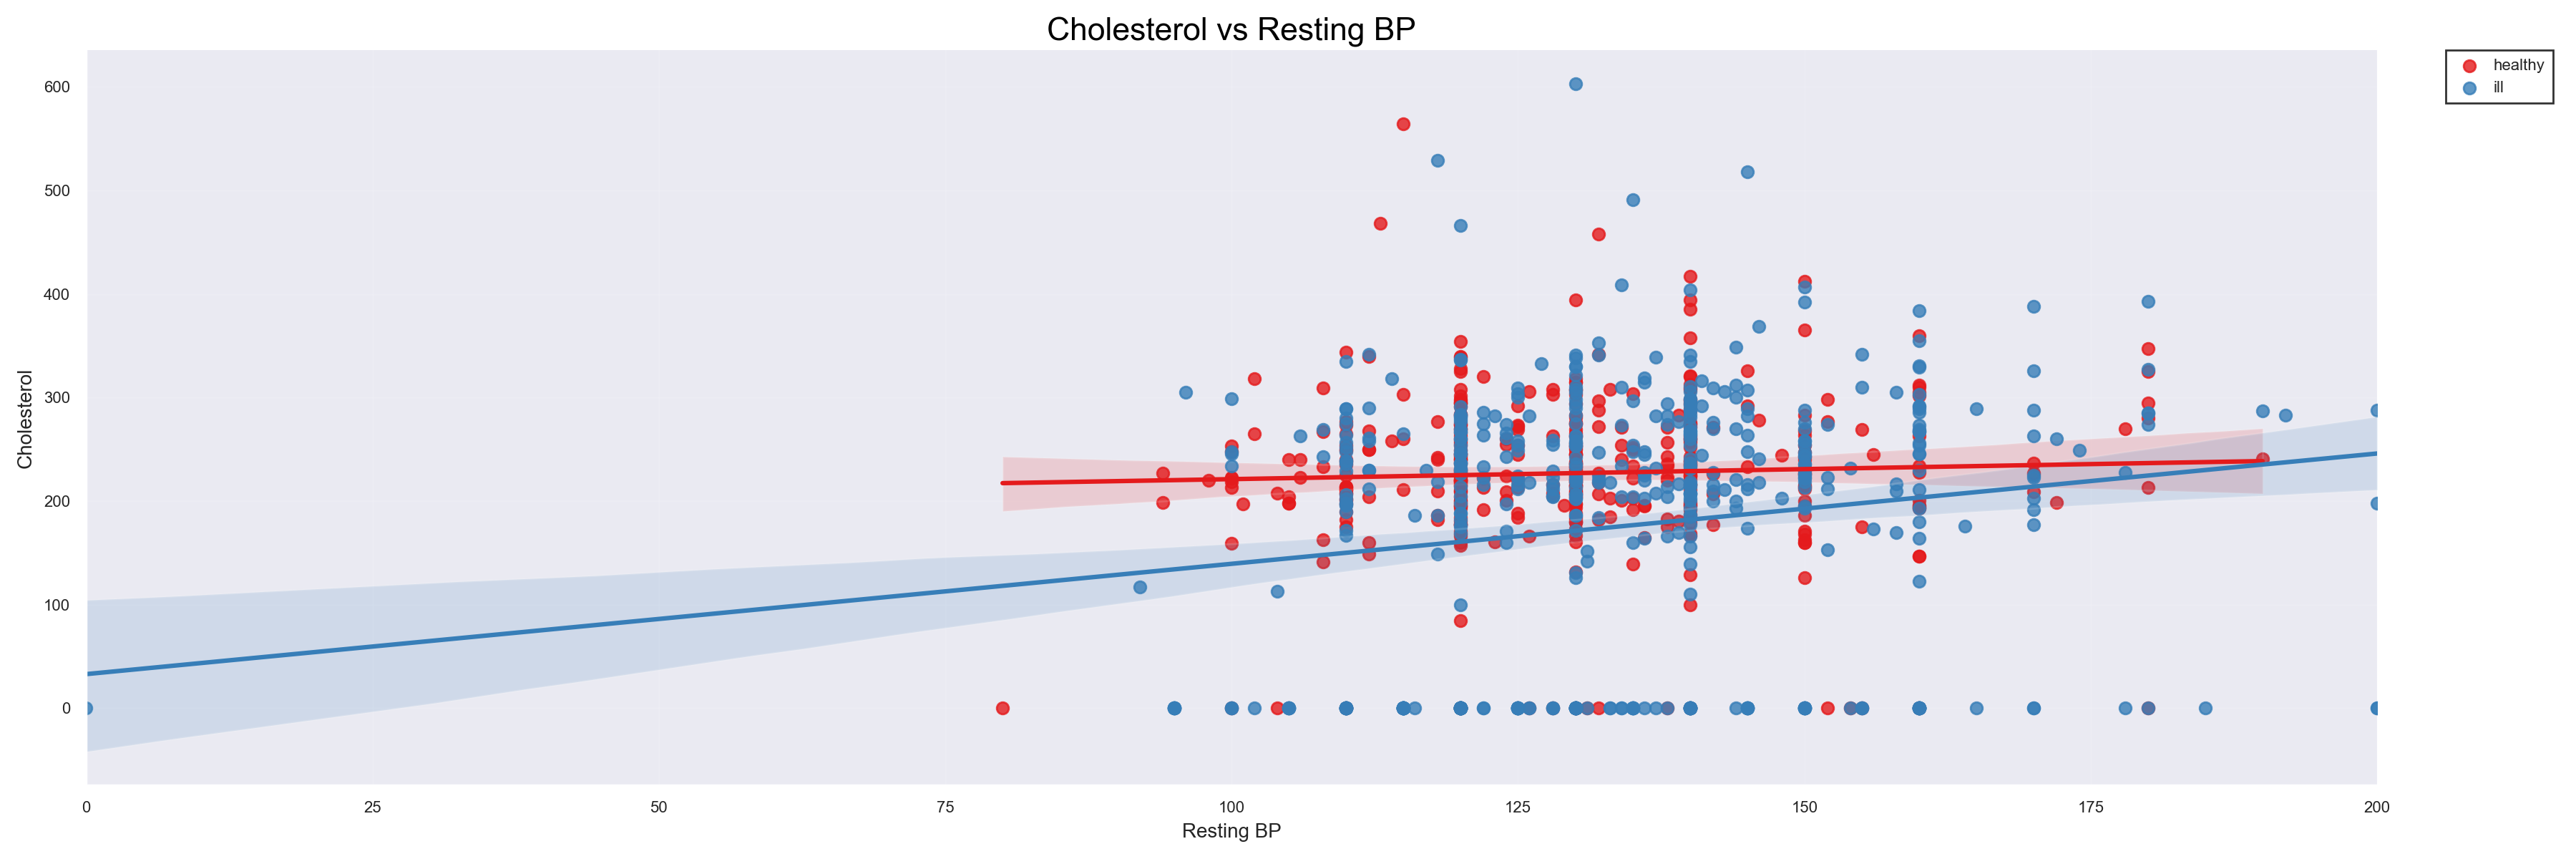

In [256]:
sns.lmplot(x='Resting BP', y='Cholesterol', hue='Heart Disease', data = heartDf, palette="Set1", 
           height=6, 
           aspect=3,
           legend=False)

plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0);
plt.title('Cholesterol vs Resting BP', fontsize=16);


- <span style="color:#003ba8"> "Cholesterol" </span>: Cholesterol level has no correlation nor an effect on resting blood pressure.



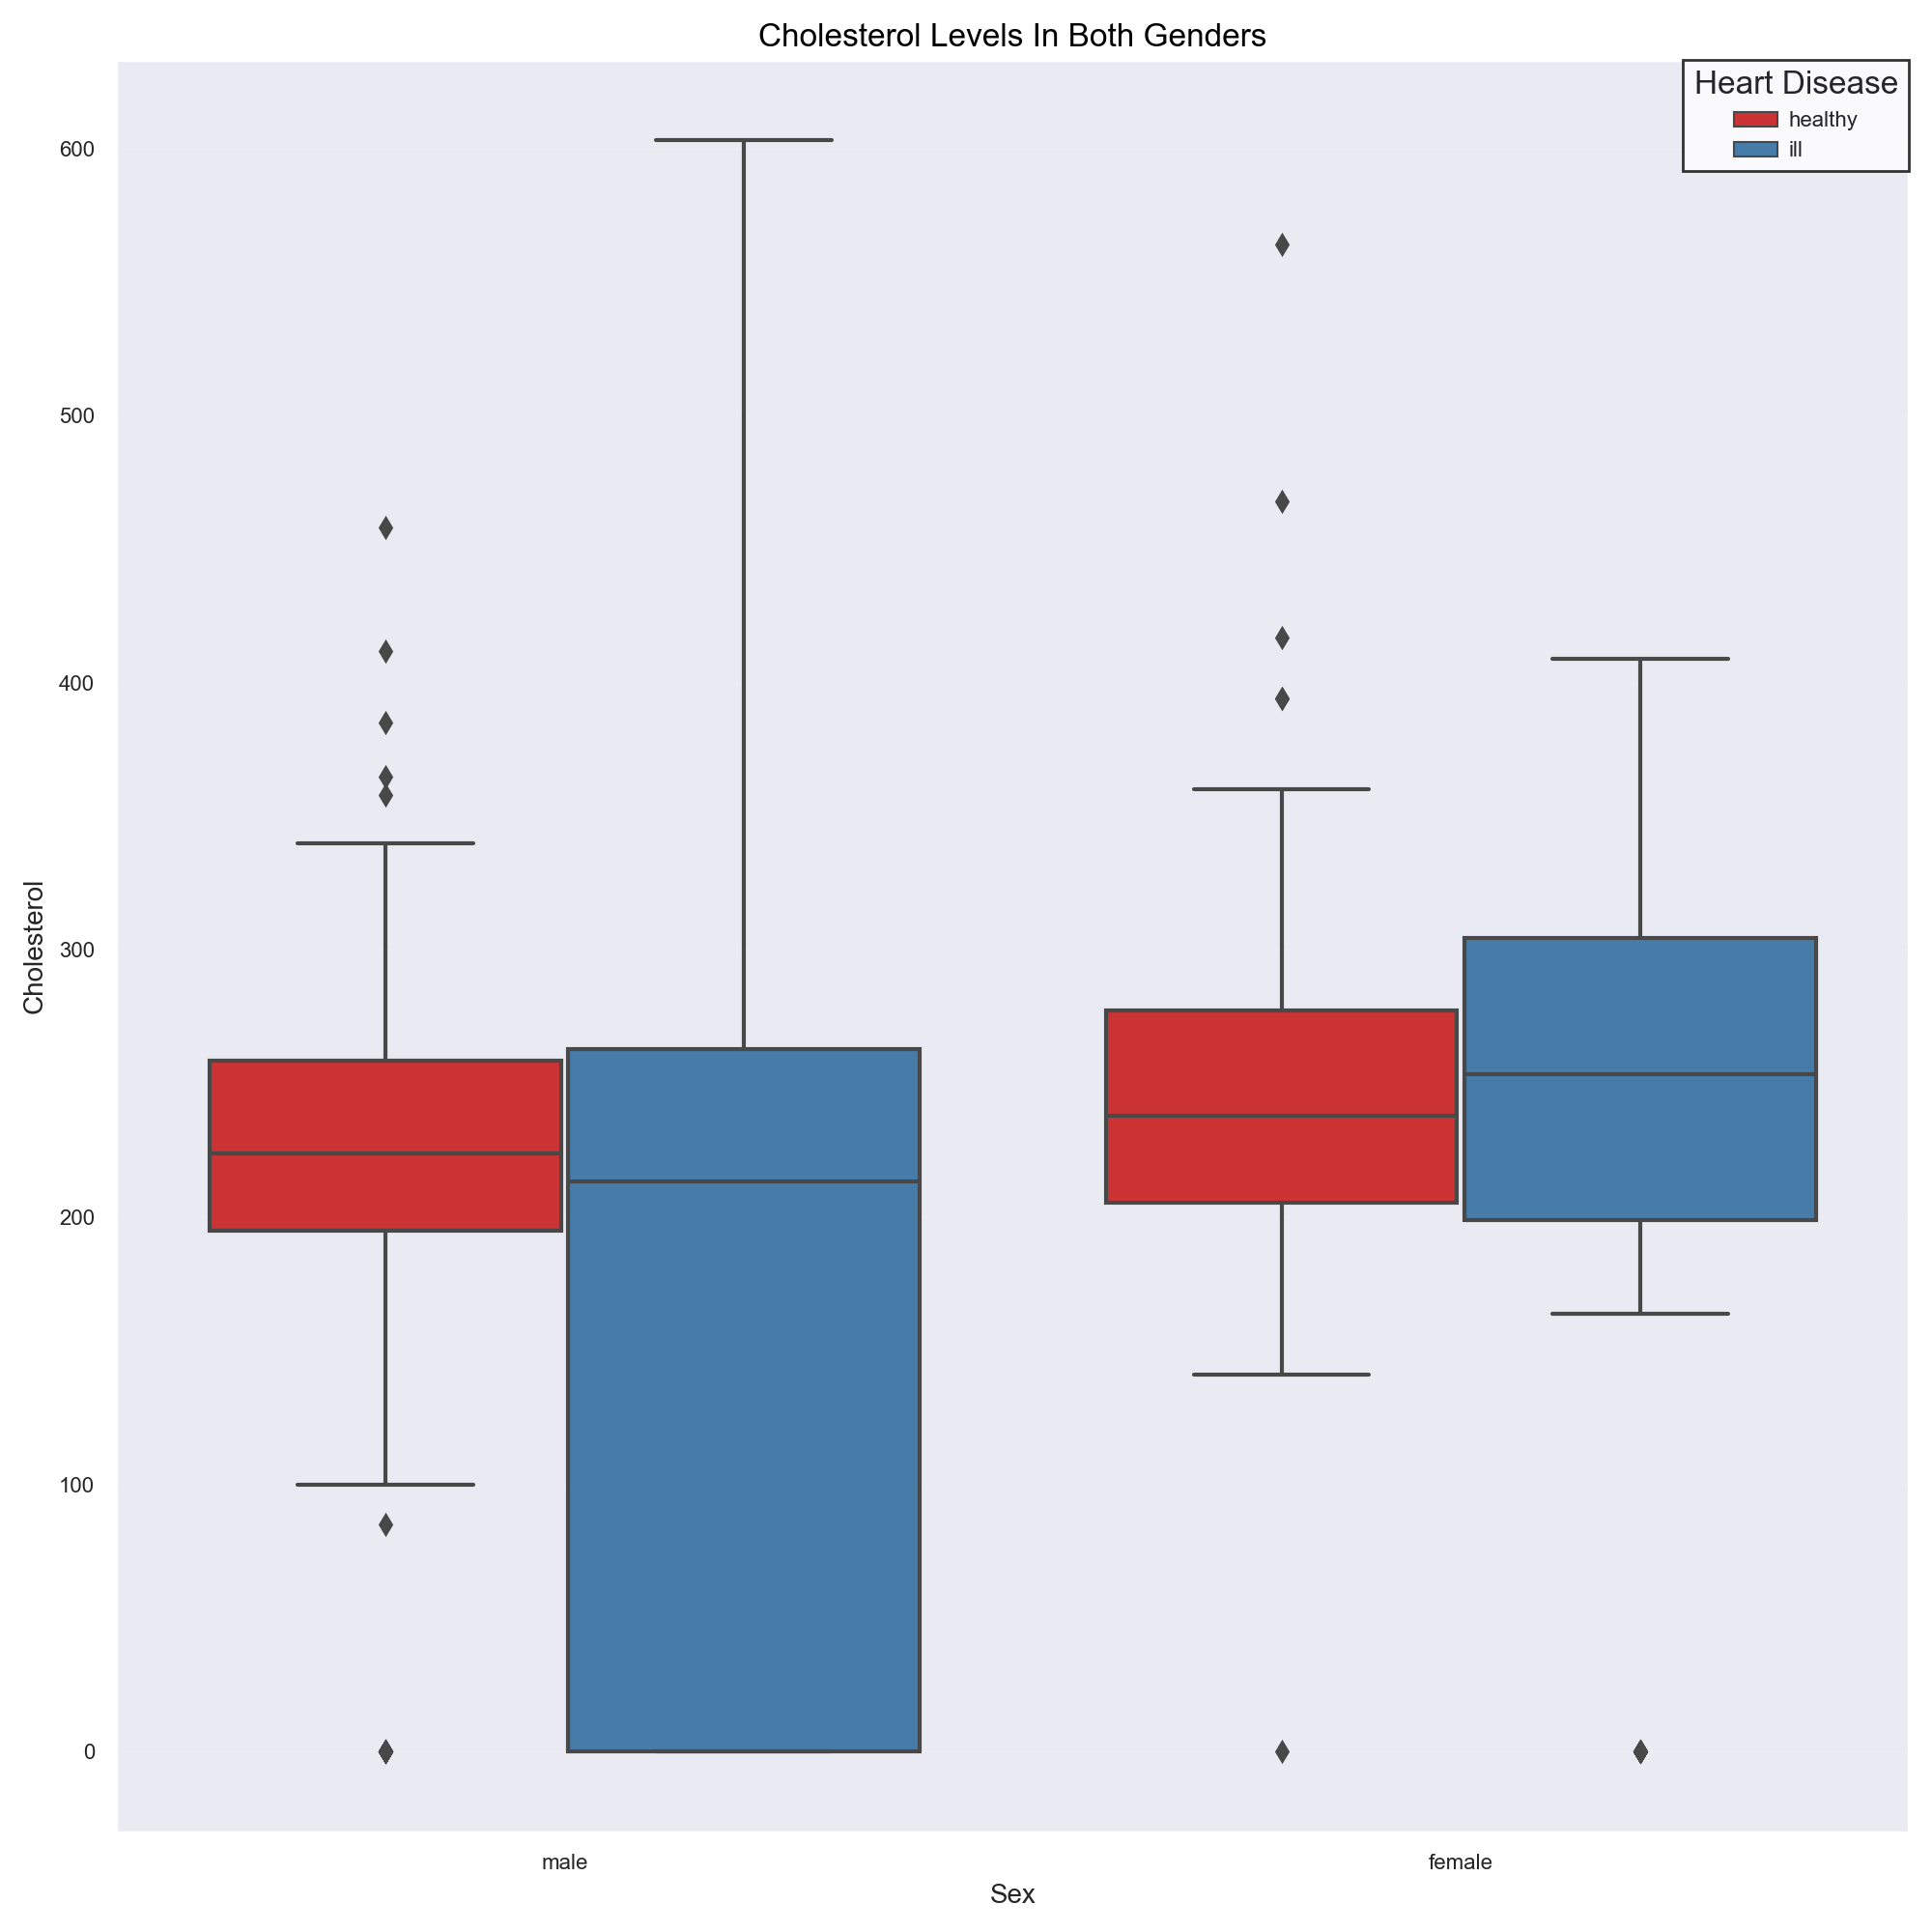

In [260]:
plt.figure(figsize = [10,10])

sns.boxplot(x ="Sex", y = "Cholesterol" , hue = "Heart Disease" , data  = heartDf , palette = "Set1")

plt.title('Cholesterol Levels In Both Genders', fontsize=12);


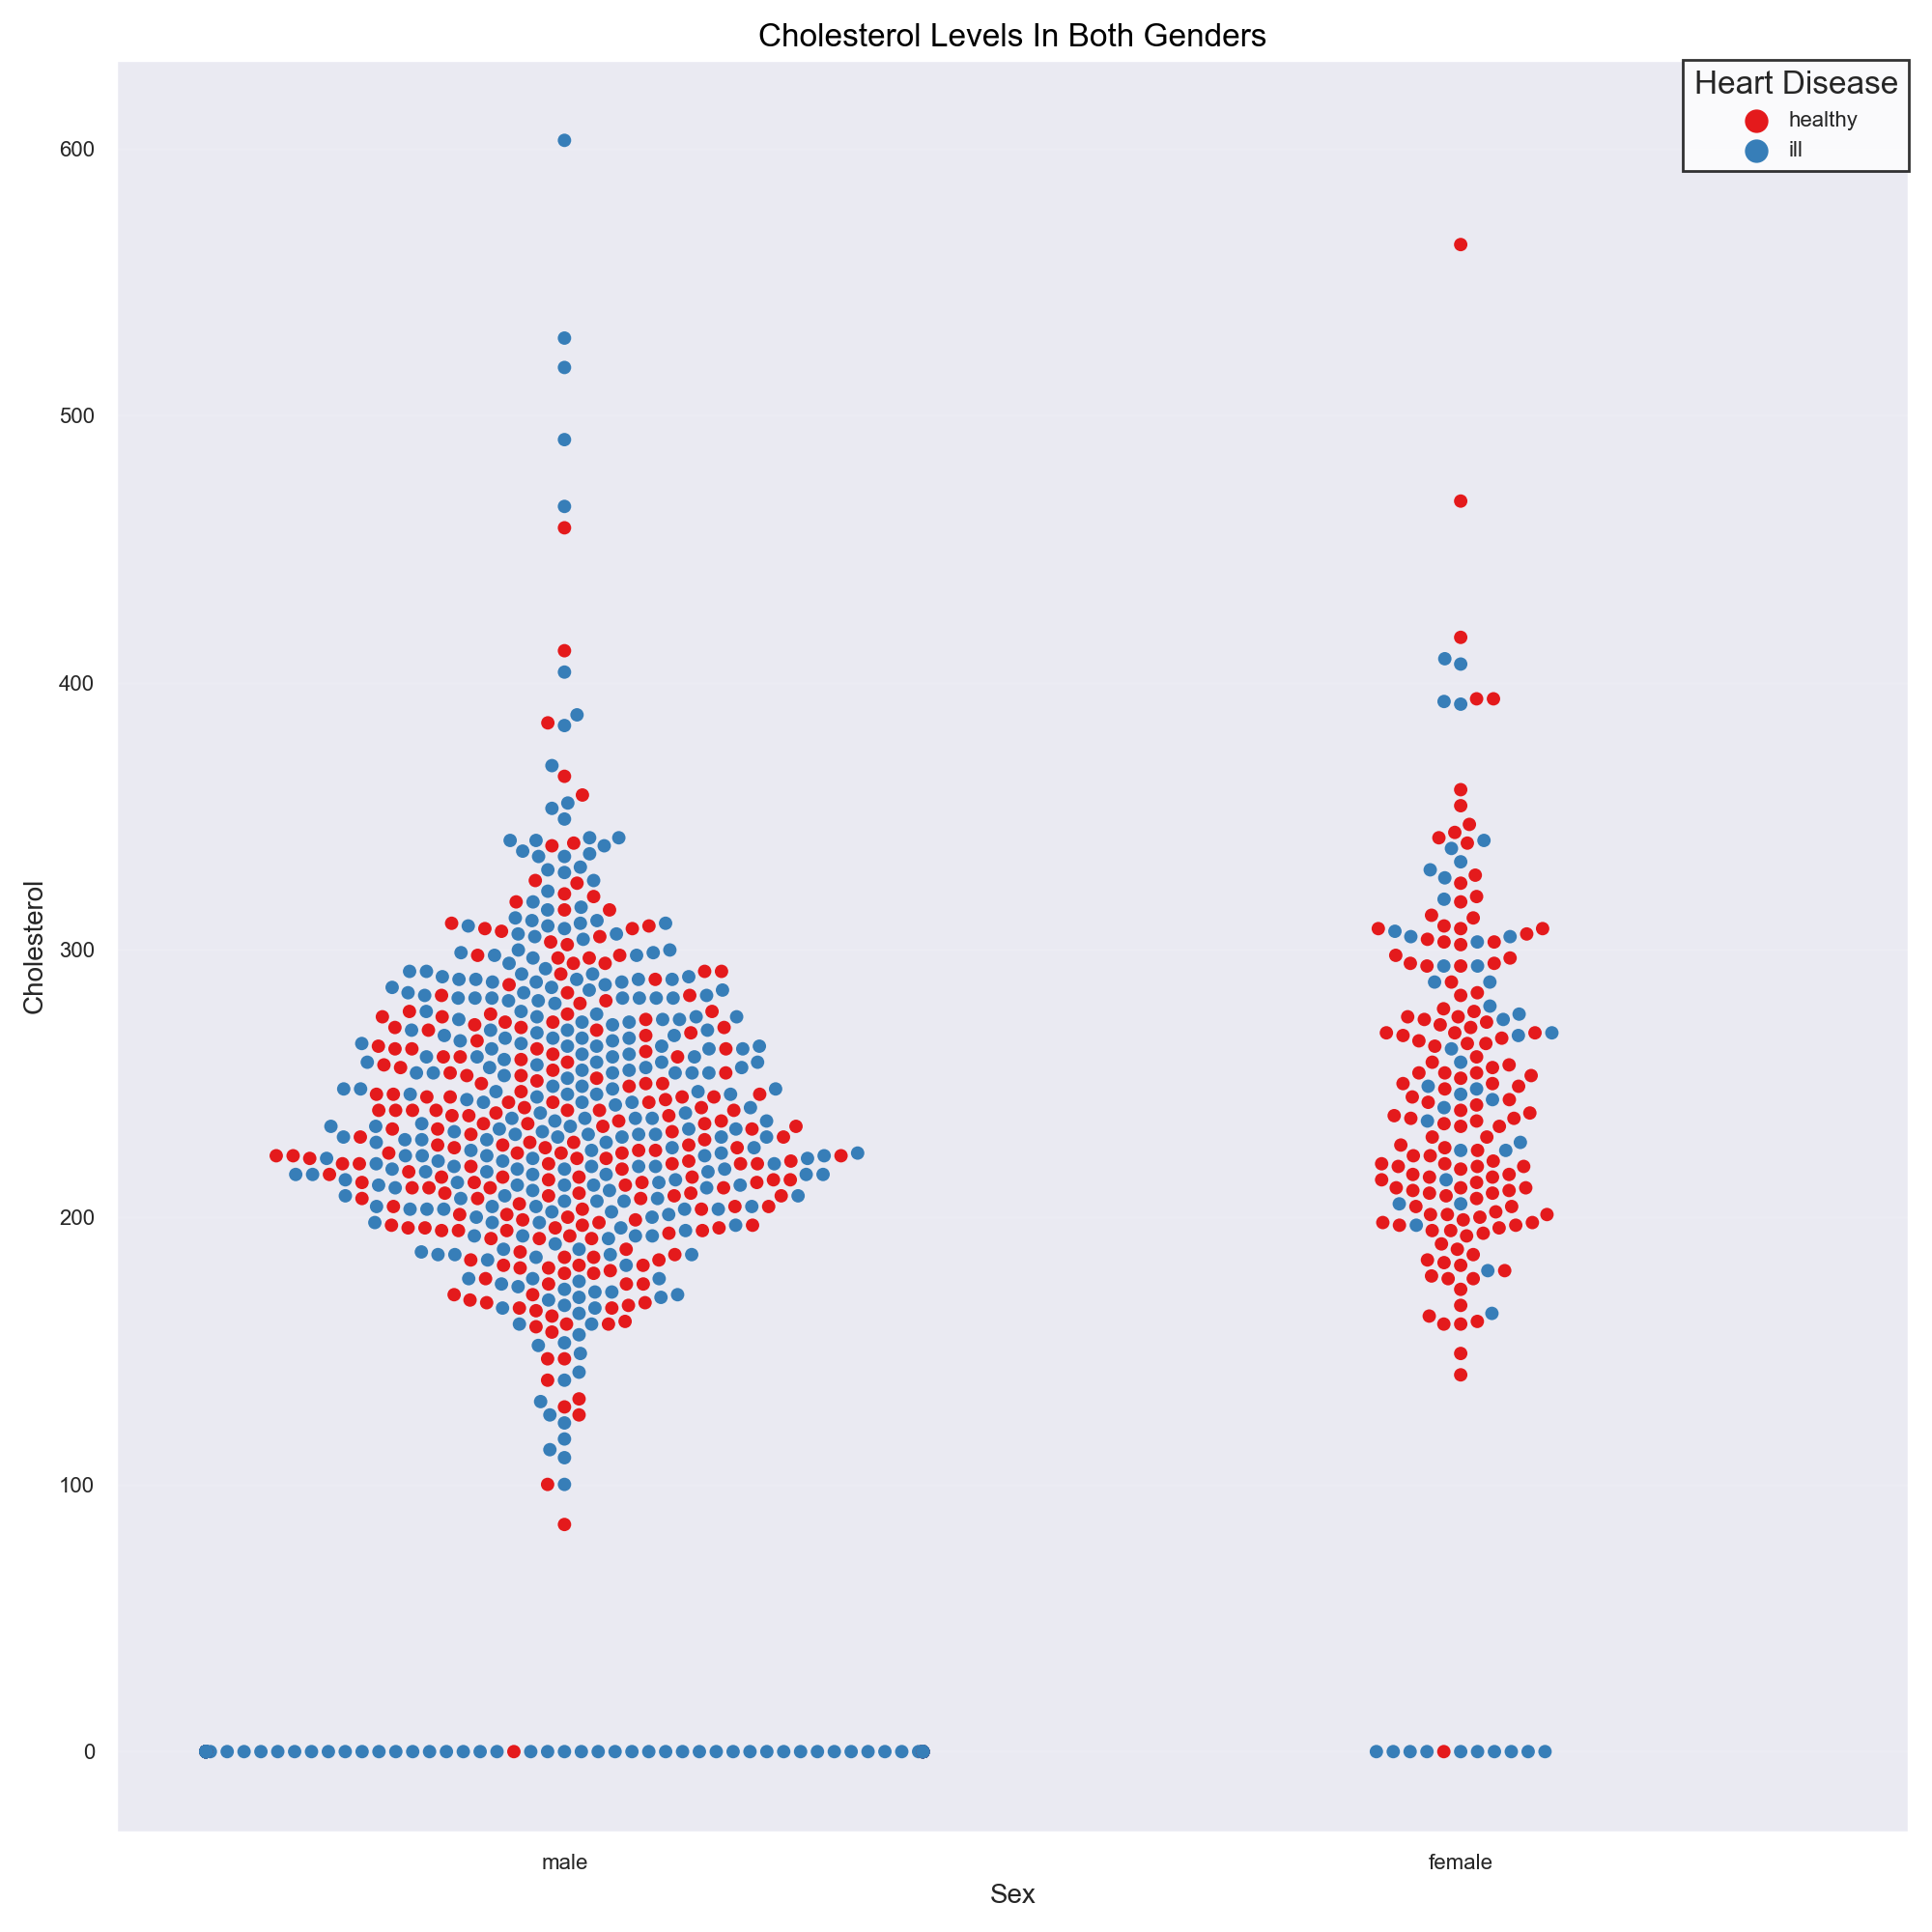

In [268]:
plt.figure(figsize = [10,10])
sns.swarmplot (x= "Sex", y = "Cholesterol" , hue = "Heart Disease" , data  = heartDf , palette = "Set1")
plt.title('Cholesterol Levels In Both Genders', fontsize=12);

From the Box plot and swarm plot above the following was concluded:
- <span style="color:#003ba8"> "Cholesterol" </span>: Females are more likely to have higher cholesterol levels than males. And having a low level of cholesterol doesn't mean the patient has no risk of a heart attack. In conclusion, if a woman has high cholesterol, she is more likely to have heart disease.


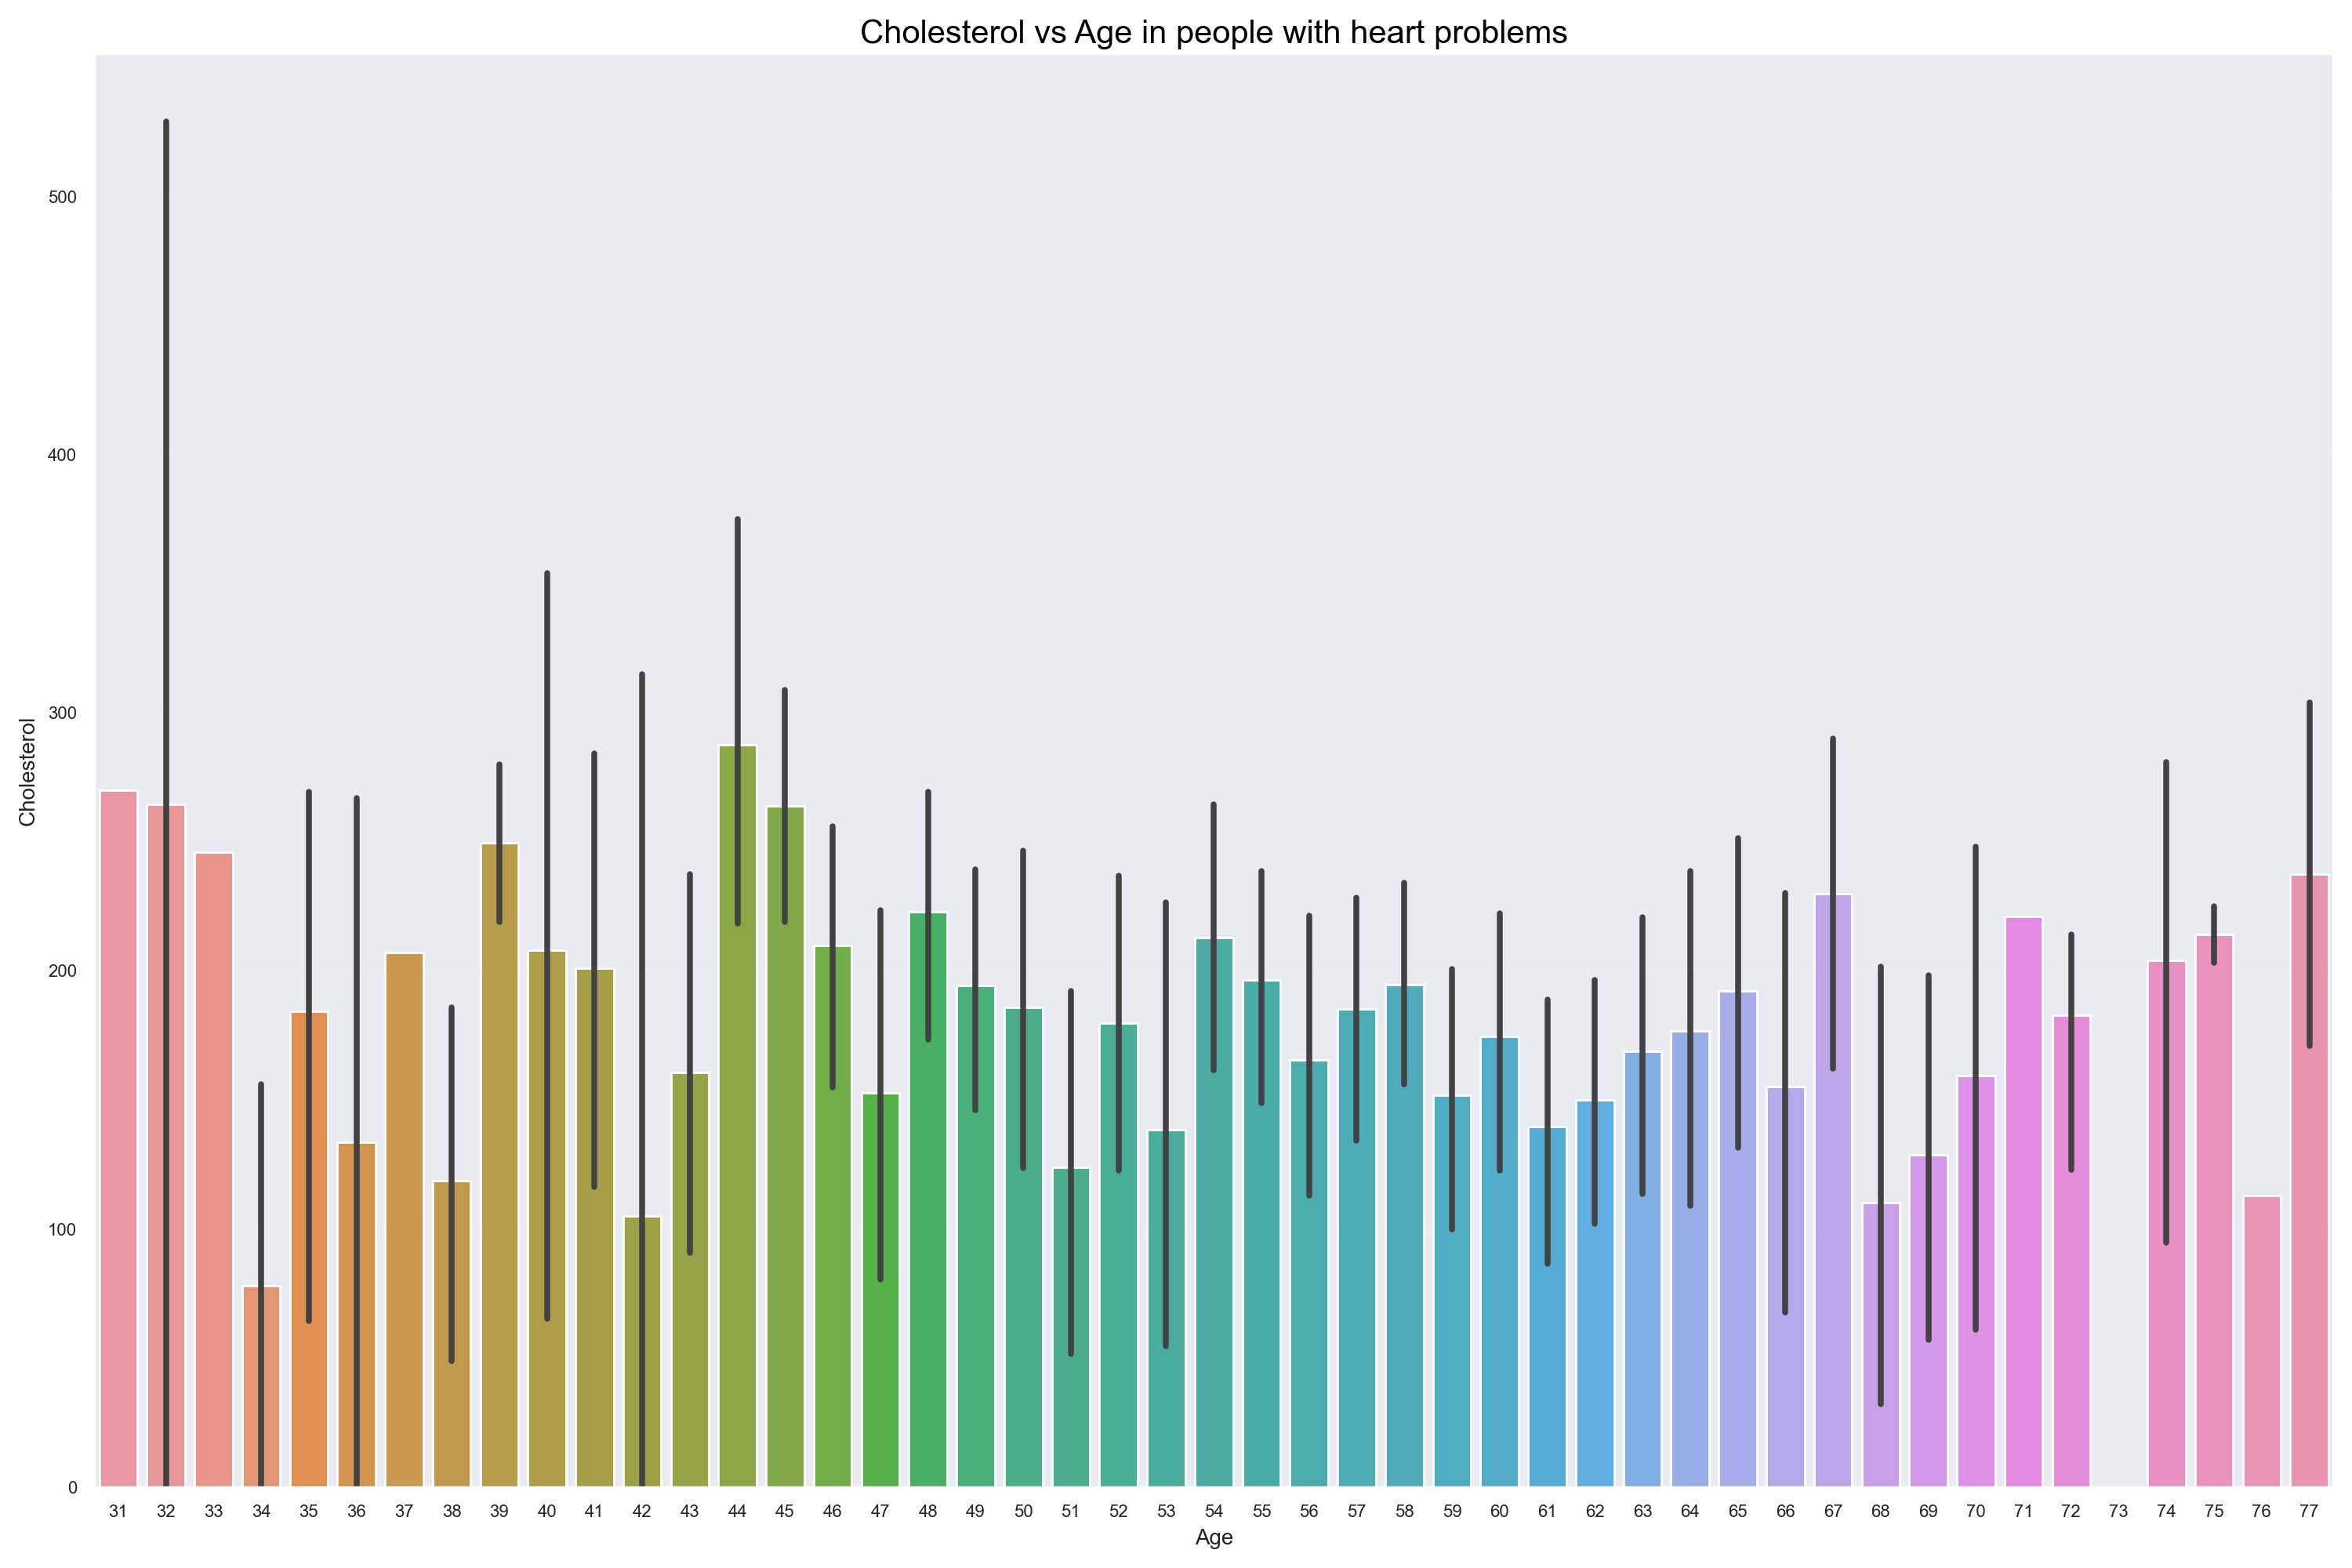

In [288]:
heart_chol = heartDf.loc[(heartDf['Heart Disease'] == 'ill')]
plt.figure(figsize=(15,10))
sns.barplot(x='Age',y='Cholesterol',data=heart_chol)
plt.title('Cholesterol vs Age in people with heart problems', fontsize=15);
plt.show()

- <span style="color:#003ba8"> "Cholesterol" </span>: The data shows that Cholesterol level is not correlated with the Age of the patient, although people aged 34 has low cholesterol level.

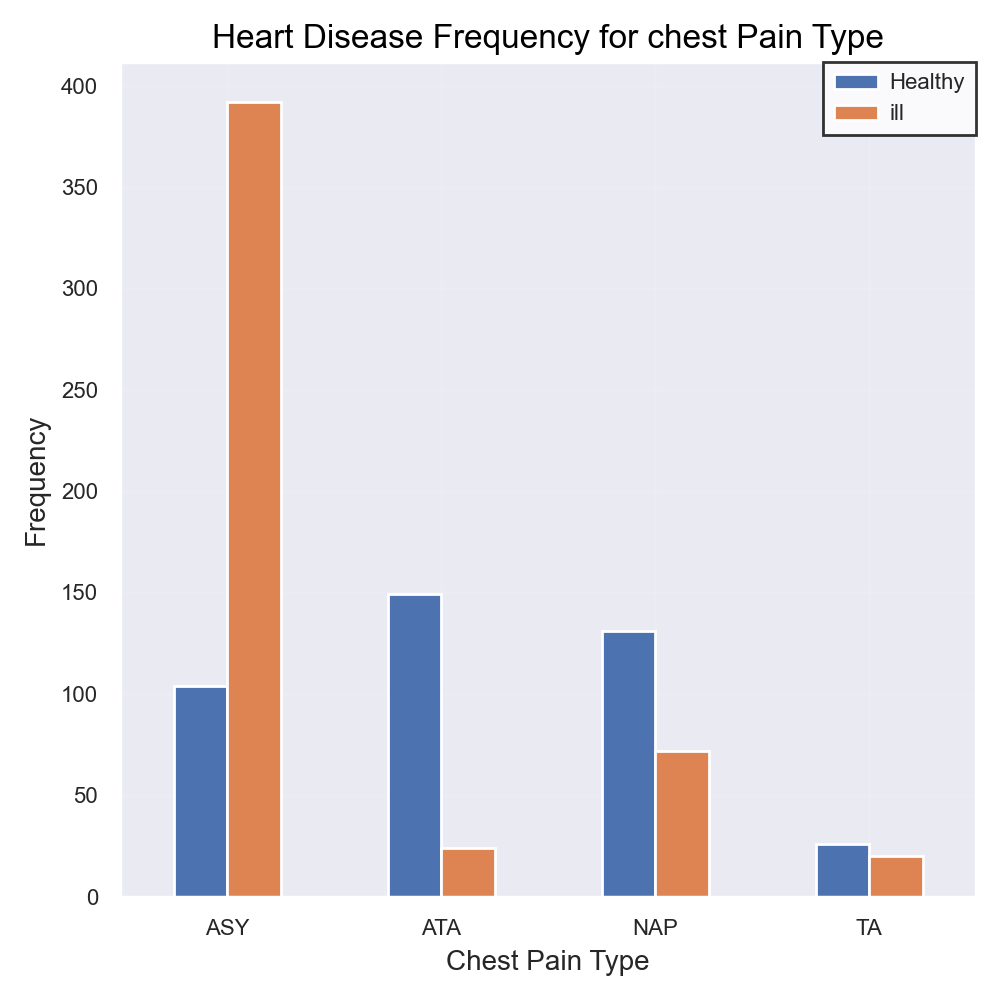

In [340]:
pd.crosstab(heartDf["Chest Pain Type"],heartDf["Heart Disease"]).plot(kind="bar",figsize=(5,5))
plt.title('Heart Disease Frequency for chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.legend(["Healthy", "ill"])
plt.ylabel('Frequency')
plt.show()

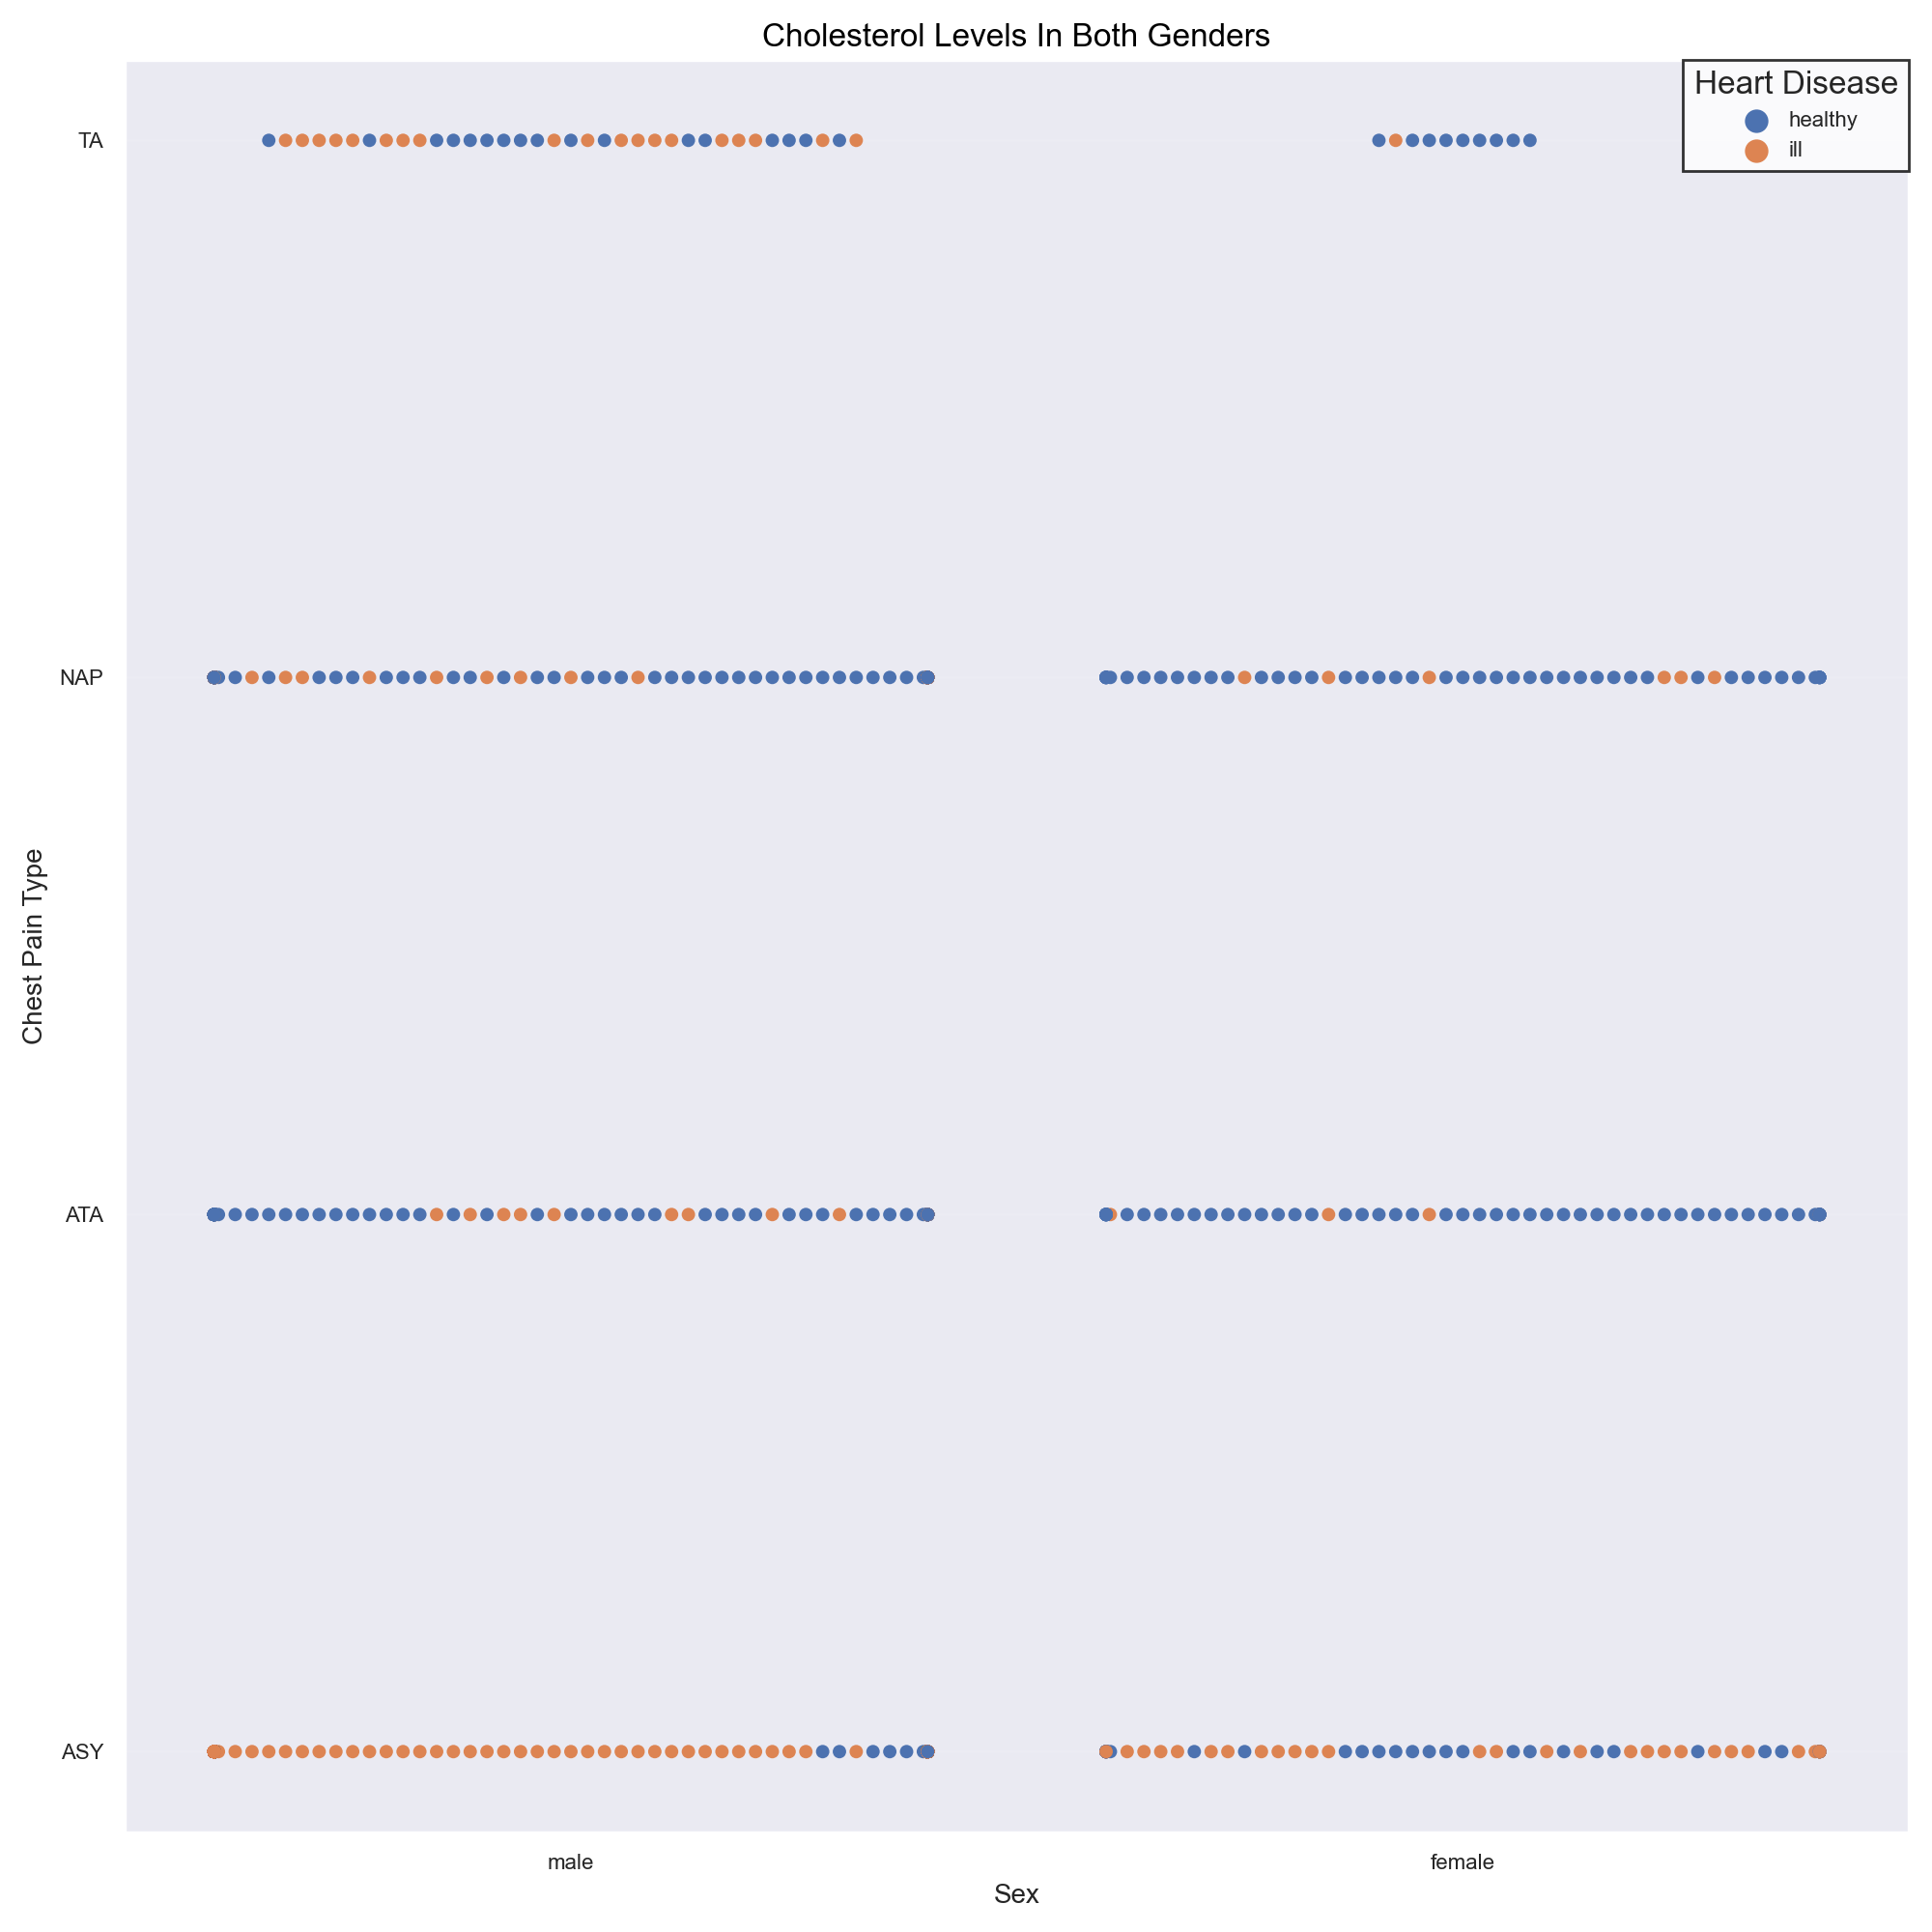

In [265]:
plt.figure(figsize = [10,10])
sns.swarmplot(x="Sex", y="Chest Pain Type", hue = "Heart Disease", data=heartDf)
plt.title('Cholesterol Levels In Both Genders', fontsize=12);

From the Box plot and Bar chart above the following was concluded:
- <span style="color:#003ba8"> "Chest Pain Type" </span>: Both genders with Asymptomatic chest pain type are the most likely to have a heart attack. Moreover, Typical angine pain is more common in males than females.
<br>

- patients with atypical angina (ATA) or non-anginal pain (NAP) had considerably lower chances of having a heart disease than those who were asymptomatic.


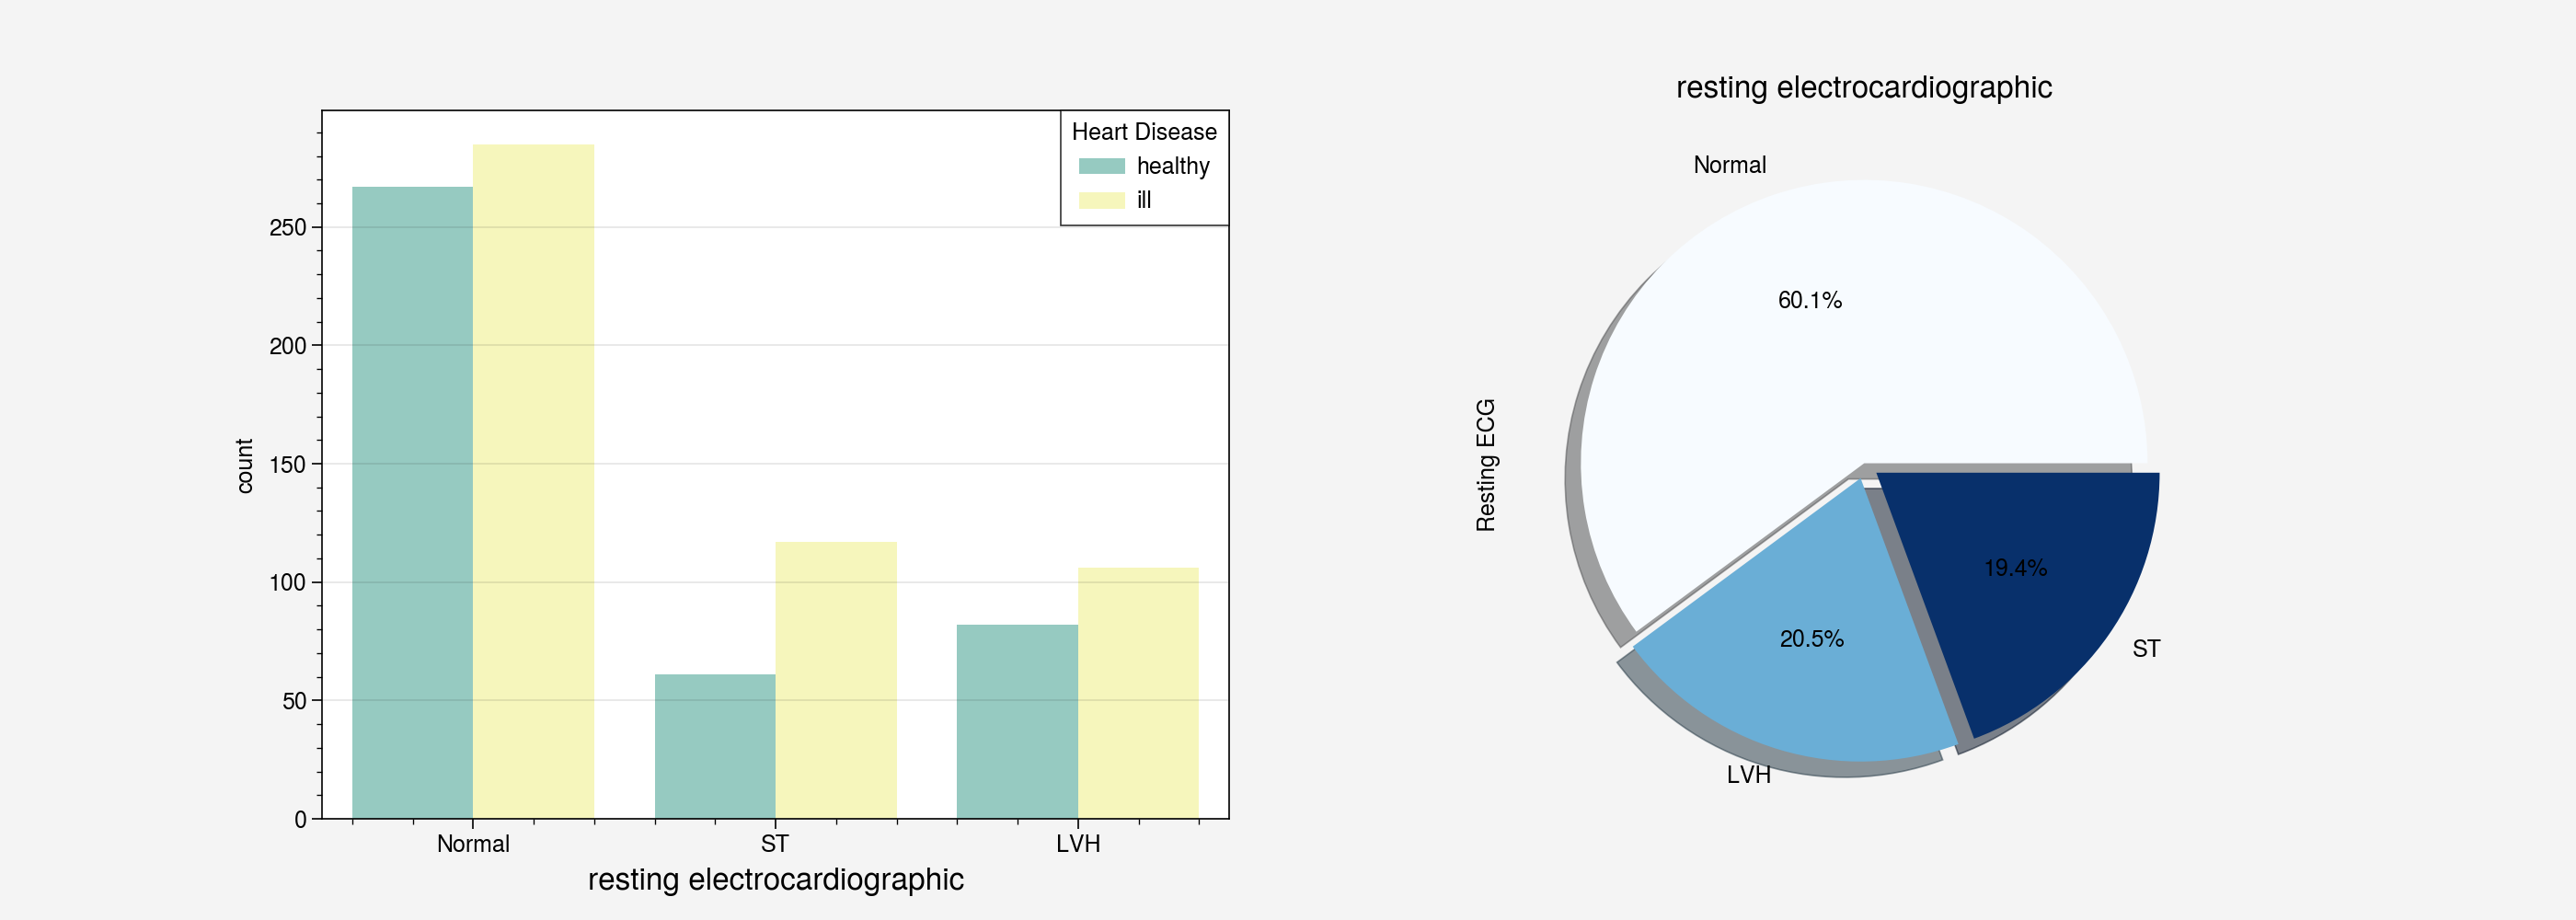

In [37]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Resting ECG',data=heartDf,hue='Heart Disease',palette='Set3',ax=ax[0])
ax[0].set_xlabel("resting electrocardiographic",size=12)
heartDf["Resting ECG"].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,
                                     explode=[0.005,0.05,0.05],cmap='Blues')
ax[1].set_title("resting electrocardiographic",size=12);

- <span style="color:#003ba8"> "Resting ECG" </span>: having ST-T wave abnormality (ST) or showing probable or definite left ventricular hypertrophy (LVH) was associated with a higher probability of being sick.


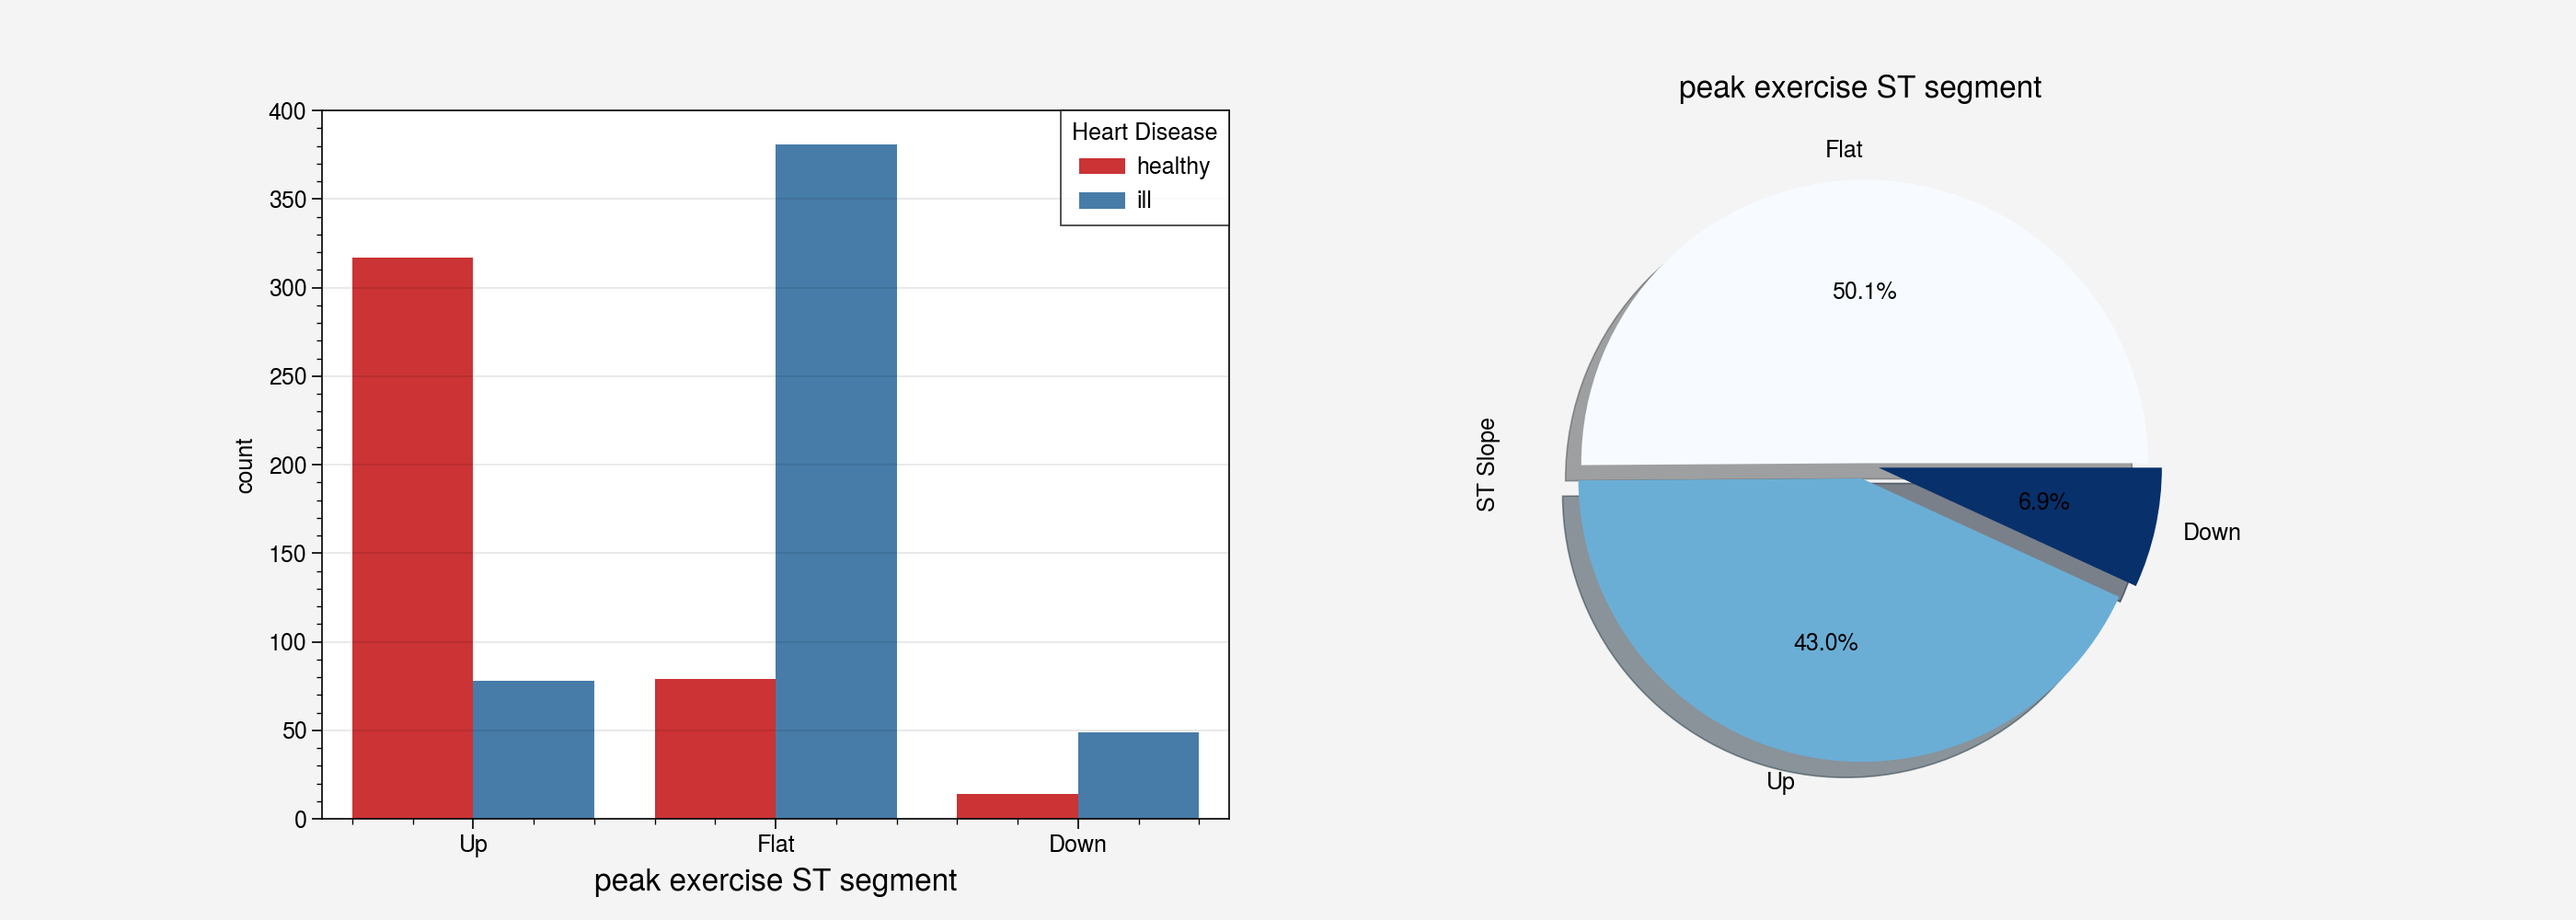

In [34]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='ST Slope',data=heartDf,hue='Heart Disease',palette='Set1',ax=ax[0])
ax[0].set_xlabel("peak exercise ST segment",size=12)
heartDf["ST Slope"].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True,explode=[0.005,0.05,0.05],cmap='Blues')

ax[1].set_title("peak exercise ST segment ",size=12);

- <span style="color:#003ba8"> "ST Slope" </span>: categories Up and Flat had an inverse relationship with the target.
<br>

- Patients with Upsloping ST segment have lower risk of having a heart attack.
<br>

- Patients with flat sloping are the most likely to have a heart attack.

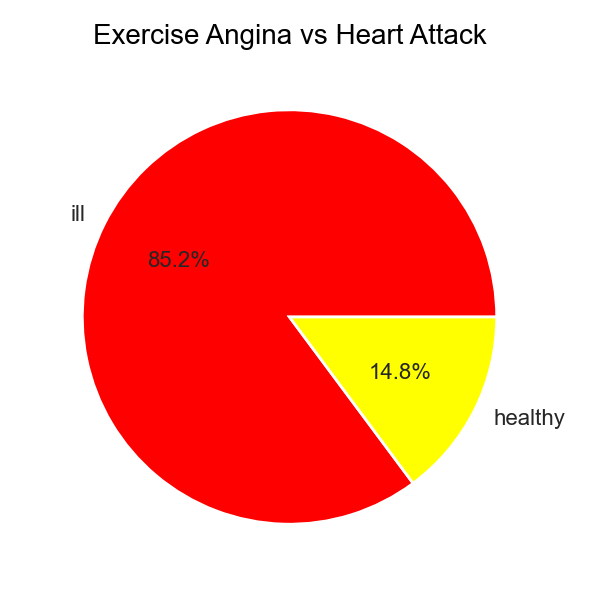

In [324]:
heart_EA =  heartDf.loc[(heartDf['Exercise Angina'] == 'yes')]

heart_EA['Heart Disease'].dropna(inplace = True)
labels = heart_EA['Heart Disease'].value_counts().index
colors = ['red','yellow']
explode = [0,0]
sizes = heart_EA['Heart Disease'].value_counts().values

plt.figure(0,figsize = (3,3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Exercise Angina vs Heart Attack',color = 'black',fontsize = 10);

- <span style="color:#003ba8"> "Exercise Angina" </span>: more than 85% of patients who suffered from exercise-induced angina had a heart disease.

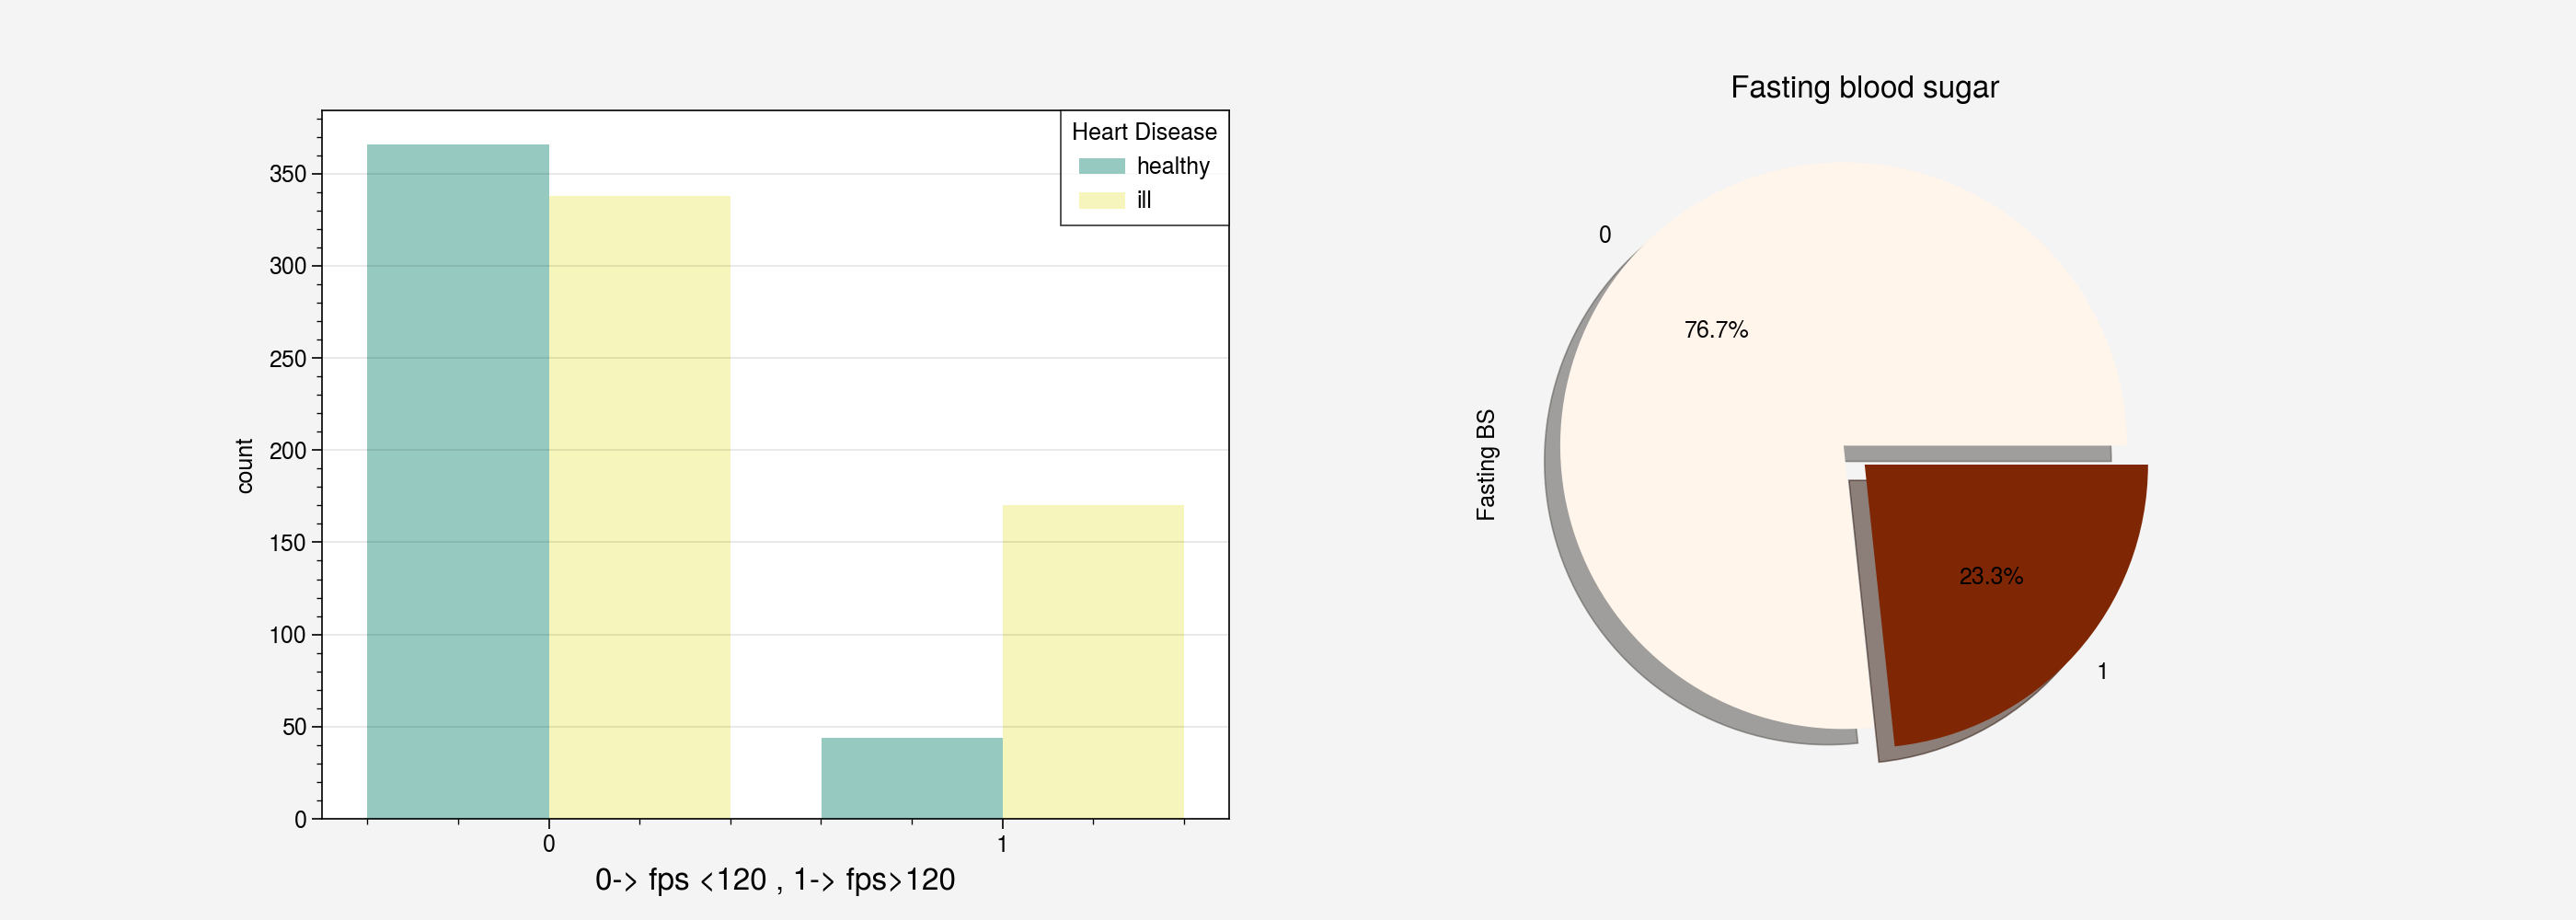

In [39]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x='Fasting BS',data=heartDf,hue='Heart Disease',palette='Set3',ax=ax[0])
ax[0].set_xlabel("0-> fps <120 , 1-> fps>120",size=12)
heartDf["Fasting BS"].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True, explode=[0.1,0],cmap='Oranges')
ax[1].set_title("Fasting blood sugar",size=12);

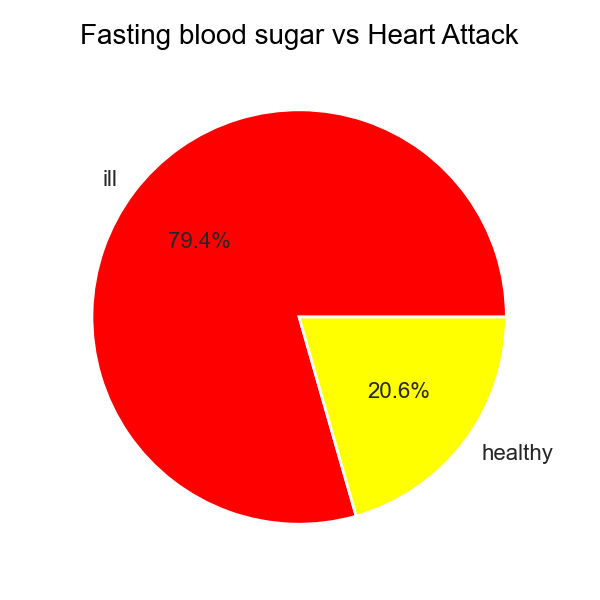

In [325]:
heart_FA =  heartDf.loc[(heartDf['Fasting BS'] == '1')]

heart_FA['Heart Disease'].dropna(inplace = True)
labels = heart_FA['Heart Disease'].value_counts().index
colors = ['red','yellow']
explode = [0,0]
sizes = heart_FA['Heart Disease'].value_counts().values

plt.figure(0,figsize = (3,3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Fasting blood sugar vs Heart Attack',color = 'black',fontsize = 10);

- <span style="color:#003ba8"> "Fasting BS" </span>: about 80% of people with a fasting blood sugar above 120 mg/dl had a heart disease.